* **ID**         : Represents a unique identification of an entry
* **Customer_ID**           : Represents a unique identification of a person
* **Month**             : Represents the month of the year
* **Name**               : Represents the name of a person
* **Age**                 : Represents the age of the person
* **SSN**                   : Represents the social security number of a person
* **Occupation**            : Represents the occupation of the person
* **Annual_Income**         : Represents the annual income of the person
* **Monthly_Inhand_Salary** : Represents the monthly base salary of a person
* **Num_Bank_Accounts**     : Represents the number of bank accounts a person holds

## importing the libraries

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn .metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn .metrics import accuracy_score
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

## Reading the data

In [2]:
pd.set_option("display.max.columns", None)

df = pd.read_csv("../input/credit-score-classification/train.csv",sep = "," , encoding = "utf-8")
df_test = pd.read_csv("../input/credit-score-classification/test.csv",sep = "," , encoding = "utf-8")

## Exploring the data

In [3]:
df.shape , df_test.shape

((100000, 28), (50000, 27))

In [4]:
df.sample(3)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
677,0x19f7,CUS_0xa77f,June,Jeanine Preziosor,28,074-21-6507,Writer,39800.12,3047.676667,7,5,12,3,"Personal Loan, Payday Loan, and Auto Loan",17,18,18.53,4.0,Standard,660.69,26.020523,18 Years and 2 Months,Yes,58.487657,121.04412241217136,High_spent_Medium_value_payments,375.23588691498566,Standard
42339,0x10e15,CUS_0x8c2d,April,Stephen Aldreda,26,333-11-9700,Media_Manager,35165.46,2694.455000,5,6,18,-100,NaN,20,18,8.21,3.0,Standard,1034.08,27.537021,20 Years and 0 Months,NM,0.000000,43.657727341216784,High_spent_Large_value_payments,465.7877726587832,Standard
53500,0x14f7a,CUS_0x3fb4,May,Sassarda,32,444-48-5334,Mechanic,73871.32,5985.943333,5,7,10,0,NaN,20,15,2.01,4.0,_,217.57,38.487470,15 Years and 5 Months,No,0.000000,206.98673315140144,Low_spent_Medium_value_payments,671.607600181932,Standard


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [6]:
df.describe().T.style.background_gradient(cmap='Blues').set_properties(**{'font-family':'Segoe UI'})

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.000000,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.000000,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.000000,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.000000,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.000000,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.000000,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.000000,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.000000,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [7]:
df.describe(exclude=np.number).T.style.background_gradient(cmap='Blues').set_properties(**{'font-family':'Segoe UI'})

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


In [8]:
missing_values_df=df.isna().sum()
missing_values_df

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

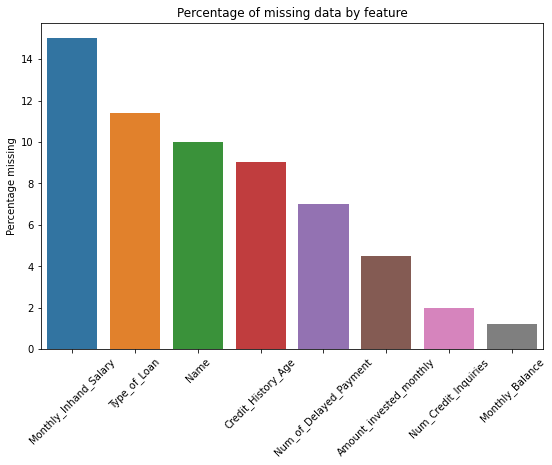

In [9]:
df_na = (missing_values_df / len(df)) * 100

# drop columns without missing values 
df_na = df_na.drop(df_na[df_na == 0].index)

#sort
df_na=df_na.sort_values(ascending=False)

# create plot
f, ax = plt.subplots(figsize=(9, 6))
plt.xticks(rotation='45')
sns.barplot(x=df_na.index, y=df_na)
ax.set(title='Percentage of missing data by feature', ylabel='Percentage missing')
plt.show()

In [10]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [11]:
object_columns=list(df.select_dtypes(include='object').columns)

In [12]:
df[object_columns].head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,11.27,_,809.98,22 Years and 1 Months,No,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,11.27,Good,809.98,NaN,No,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,_,Good,809.98,22 Years and 3 Months,No,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,6.27,Good,809.98,22 Years and 4 Months,No,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,11.27,Good,809.98,22 Years and 5 Months,No,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [13]:
df.shape

(100000, 28)

## Edit columns and Data Type

In [14]:
df = df.applymap(lambda x: x if x is np.NaN or not isinstance(x, str) else str(x).strip('_ ,"')).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN)

In [15]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,NaN,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [16]:
df['ID'] = df.ID.apply(lambda x: int(x, 16))

In [17]:
df['Customer_ID'] = df.Customer_ID.apply(lambda x: int(x[4:], 16))

In [18]:
df['Age'] = df.Age.astype(int)        

In [19]:
df['SSN'] = df.SSN.apply(lambda x: x if x is np.NaN else float(str(x).replace('-', ''))).astype(float)

In [20]:
df['Annual_Income'] = df.Annual_Income.astype(float)

In [21]:
df['Num_of_Loan'] = df.Num_of_Loan.astype(int) 

In [22]:
df['Num_of_Delayed_Payment'] = df.Num_of_Delayed_Payment.astype(float)

In [23]:
df['Changed_Credit_Limit'] = df.Changed_Credit_Limit.astype(float)

In [24]:
df['Outstanding_Debt'] = df.Outstanding_Debt.astype(float)

In [25]:
df['Amount_invested_monthly'] = df.Amount_invested_monthly.astype(float)

In [26]:
df['Monthly_Balance'] = df.Monthly_Balance.astype(float)

In [27]:
def Month_Converter(x):
    if pd.notnull(x):
        num1 = int(x.split(' ')[0])
        num2 = int(x.split(' ')[3])
      
        return num1*12+num2
    else:
        return x

In [28]:
df['Credit_History_Age'] = df.Credit_History_Age.apply(lambda x: Month_Converter(x)).astype(float)

In [29]:
df.shape

(100000, 28)

In [30]:
object_columns=list(df.select_dtypes(include='object').columns)
df[object_columns].head()

,Month,Name,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,January,Aaron Maashoh,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,No,High_spent_Small_value_payments,Good
1,February,Aaron Maashoh,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Large_value_payments,Good
2,March,Aaron Maashoh,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Medium_value_payments,Good
3,April,Aaron Maashoh,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Small_value_payments,Good
4,May,Aaron Maashoh,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,High_spent_Medium_value_payments,Good


In [31]:
num_columns = list(df.select_dtypes(include=["int64","float64"]).columns)
df[num_columns].head()

,ID,Customer_ID,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,5634,3392,23,821000265.0,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,4.0,809.98,26.822620,265.0,49.574949,80.415295,312.494089
1,5635,3392,23,821000265.0,19114.12,NaN,3,4,3,4,-1,NaN,11.27,4.0,809.98,31.944960,NaN,49.574949,118.280222,284.629162
2,5636,3392,-500,821000265.0,19114.12,NaN,3,4,3,4,3,7.0,NaN,4.0,809.98,28.609352,267.0,49.574949,81.699521,331.209863
3,5637,3392,23,821000265.0,19114.12,NaN,3,4,3,4,5,4.0,6.27,4.0,809.98,31.377862,268.0,49.574949,199.458074,223.451310
4,5638,3392,23,821000265.0,19114.12,1824.843333,3,4,3,4,6,NaN,11.27,4.0,809.98,24.797347,269.0,49.574949,41.420153,341.489231


## Missing data

In [32]:
def columns_with_missing_values(DataFrame):
    missing_columns=(DataFrame.isnull().sum())
    return missing_columns[missing_columns > 0]
columns_with_missing_values(df)

Name                        9985
SSN                         5572
Occupation                  7062
Monthly_Inhand_Salary      15002
Type_of_Loan               11408
Num_of_Delayed_Payment      7002
Changed_Credit_Limit        2091
Num_Credit_Inquiries        1965
Credit_Mix                 20195
Credit_History_Age          9030
Amount_invested_monthly     4479
Payment_Behaviour           7600
Monthly_Balance             1200
dtype: int64

In [33]:
missing_columns=(df.isnull().sum())
(missing_columns[missing_columns > 0]).index

Index(['Name', 'SSN', 'Occupation', 'Monthly_Inhand_Salary', 'Type_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Credit_History_Age',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [34]:
miss_num_columns = list(df[(missing_columns[missing_columns > 0]).index].select_dtypes(include=["int64","float64"]).columns)
miss_object_columns=list(df[(missing_columns[missing_columns > 0]).index].select_dtypes(include='object').columns)

In [35]:
df.shape

(100000, 28)

## Detect Outliers and Fill NaN Values for Every columns

In [36]:
miss_num_columns = list(df[(missing_columns[missing_columns > 0]).index].select_dtypes(include=["int64","float64"]).columns)
miss_num_columns

['SSN',
 'Monthly_Inhand_Salary',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Credit_History_Age',
 'Amount_invested_monthly',
 'Monthly_Balance']

In [37]:
def Distribution2(columne,data,i):
    fig, ax = plt.subplots(1,2, figsize = (15,5))
    font_dict = {'fontsize': 14}
    title=['Before Distribution','After Distribution']
    ax = np.ravel(ax)
    if i==1:
        sns.set(style='whitegrid')
        sns.kdeplot(data=data,x=columne ,ax = ax[0],color='r').set_title(title[i])
        sns.boxplot(data=data,x=columne ,ax = ax[1],palette='magma').set_title(title[i])
    else:
        sns.set(style='whitegrid')
        sns.kdeplot(data=data,x=columne ,ax = ax[0],color='#2171b5').set_title(title[i])
        sns.boxplot(data=data,x=columne ,ax = ax[1],color='#2171b5').set_title(title[i])
        
    ax = np.reshape(ax, (1, 2))
    plt.tight_layout()

In [38]:
data=df.copy()

### SSN

In [39]:
data.drop('SSN',axis=1,inplace=True)

In [40]:
data.shape

(100000, 27)

### Monthly_Inhand_Salary

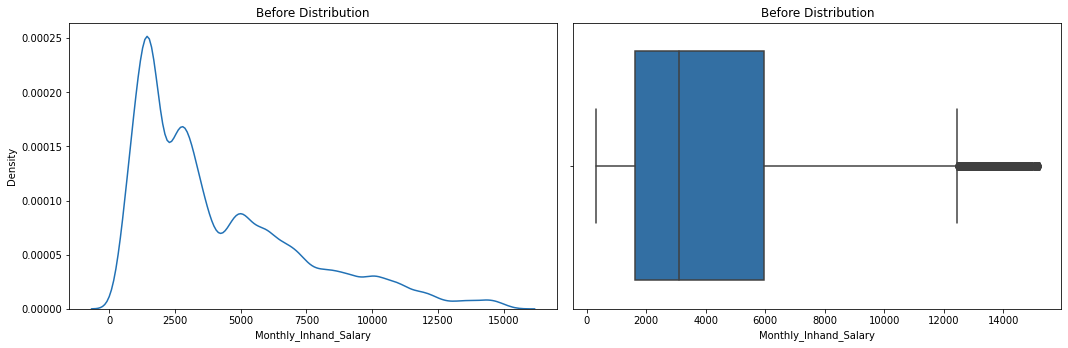

In [41]:
Distribution2(columne='Monthly_Inhand_Salary',data=data,i=0)

In [42]:
def get_Monthly_Inhand_Salary(row):
    if pd.isnull(row['Monthly_Inhand_Salary']):
        Monthly_Inhand_Salary=(data[data['Customer_ID']==row['Customer_ID']]['Monthly_Inhand_Salary'].dropna()).mode()
        try:
            return Monthly_Inhand_Salary[0]
        except:
            return np.NaN
    else:
        return row['Monthly_Inhand_Salary']

In [43]:
data['Monthly_Inhand_Salary']=data.apply(get_Monthly_Inhand_Salary,axis=1)

In [44]:
#Detect Outliers
print(data[data['Monthly_Inhand_Salary']>= 13500].shape)
data=data[data.Monthly_Inhand_Salary < 13500]

(1280, 27)


In [45]:
data.shape

(98720, 27)

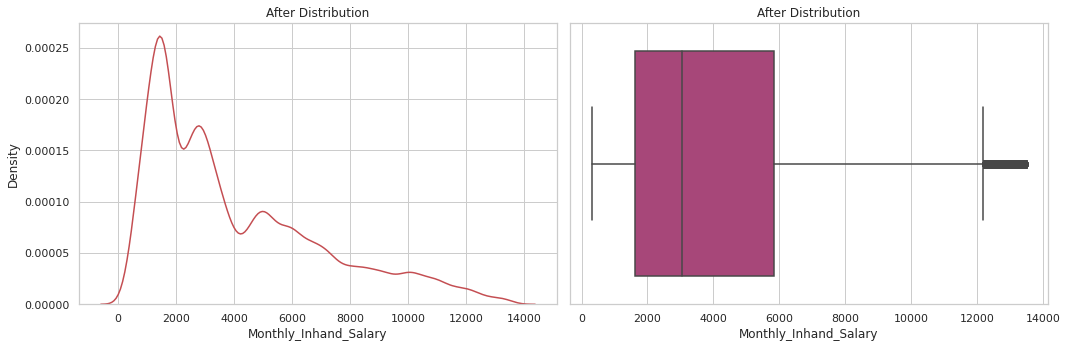

In [46]:
Distribution2(columne='Monthly_Inhand_Salary',data=data,i=1)

### Num_of_Delayed_Payment

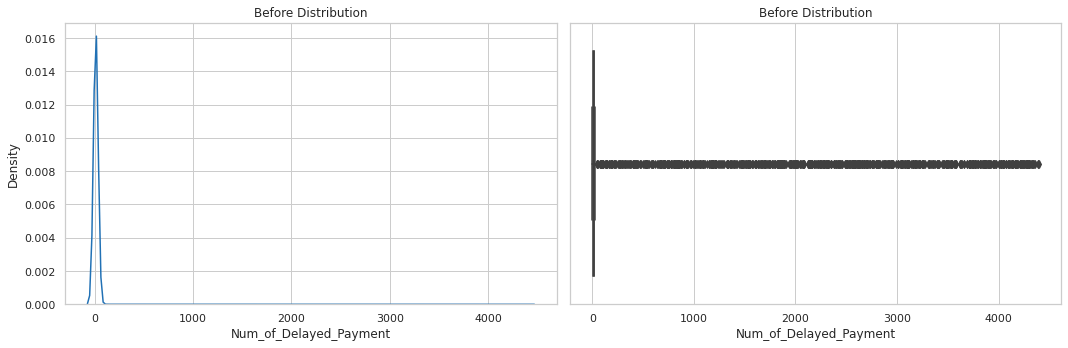

In [47]:
Distribution2(columne='Num_of_Delayed_Payment',data=data,i=0)

In [48]:
def get_Num_of_Delayed_Payment(row):
    if pd.isnull(row['Num_of_Delayed_Payment']):
        Num_of_Delayed_Payment=(data[data['Customer_ID']==row['Customer_ID']]['Num_of_Delayed_Payment'].dropna()).mode()
        try:
            return Num_of_Delayed_Payment[0]
        except:
            return np.NaN
    else:
        return row['Num_of_Delayed_Payment']

In [49]:
data['Num_of_Delayed_Payment']=data.apply(get_Num_of_Delayed_Payment,axis=1)

In [50]:
print(data[data['Num_of_Delayed_Payment']>=150].shape)
print(data[data['Num_of_Delayed_Payment'] < 0].shape)
data=data[data['Num_of_Delayed_Payment']< 150]
data=data[data['Num_of_Delayed_Payment'] >= 0]

(703, 27)
(624, 27)


In [51]:
data.shape

(97393, 27)

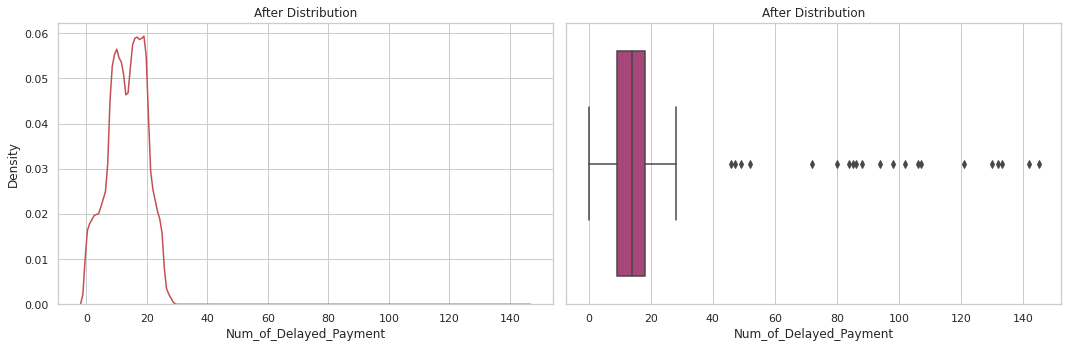

In [52]:
Distribution2(columne='Num_of_Delayed_Payment',data=data,i=1)

### Changed_Credit_Limit

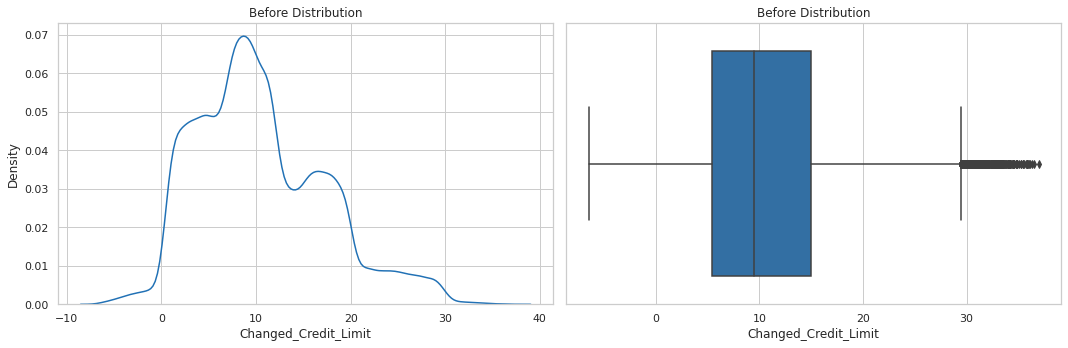

In [53]:
Distribution2(columne='Changed_Credit_Limit',data=data,i=0)

In [54]:
def get_Changed_Credit_Limit(row):
    if pd.isnull(row['Changed_Credit_Limit']):
        Changed_Credit_Limit=(data[data['Customer_ID']==row['Customer_ID']]['Changed_Credit_Limit'].dropna()).mode()
        try:
            return Changed_Credit_Limit[0]
        except:
            return np.NaN
    else:
        return row['Changed_Credit_Limit']

In [55]:
data['Changed_Credit_Limit']=data.apply(get_Changed_Credit_Limit,axis=1)

In [56]:
print(data[data['Changed_Credit_Limit']>=30].shape)
data=data[data['Changed_Credit_Limit'] < 30]

(254, 27)


In [57]:
data.shape

(97139, 27)

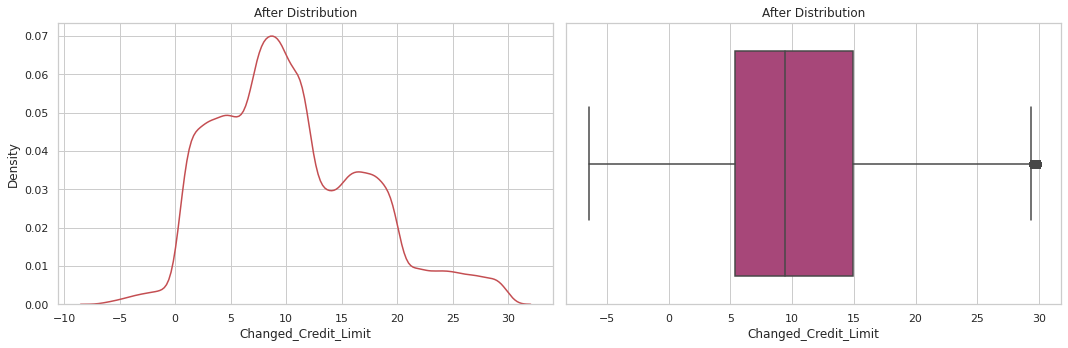

In [58]:
Distribution2(columne='Changed_Credit_Limit',data=data,i=1)

### Num_Credit_Inquiries

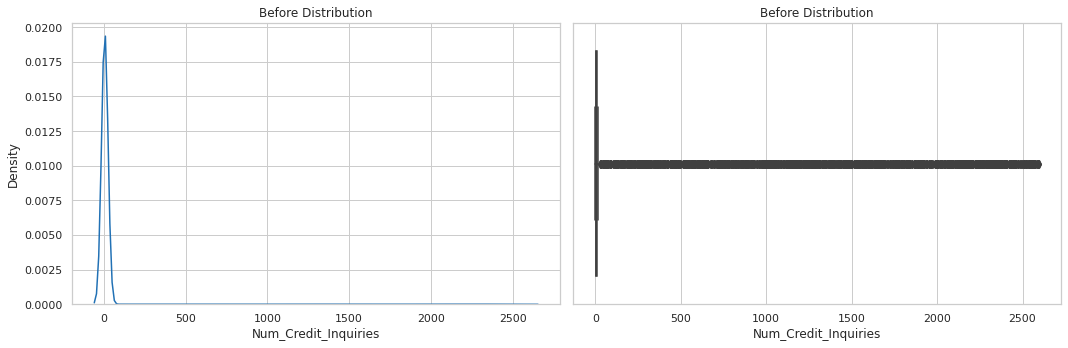

In [59]:
Distribution2(columne='Num_Credit_Inquiries',data=data,i=0)

In [60]:
def get_Num_Credit_Inquiries(row):
    if pd.isnull(row['Num_Credit_Inquiries']):
        Num_Credit_Inquiries=(data[data['Customer_ID']==row['Customer_ID']]['Num_Credit_Inquiries'].dropna()).mode()
        try:
            return Num_Credit_Inquiries[0]
        except:
            return np.NaN
    else:
        return row['Num_Credit_Inquiries']

In [61]:
data['Num_Credit_Inquiries']=data.apply(get_Num_Credit_Inquiries,axis=1)

In [62]:
print(data[data['Num_Credit_Inquiries']>=50].shape)
data=data[data['Num_Credit_Inquiries']<50]

(1590, 27)


In [63]:
data.shape

(95549, 27)

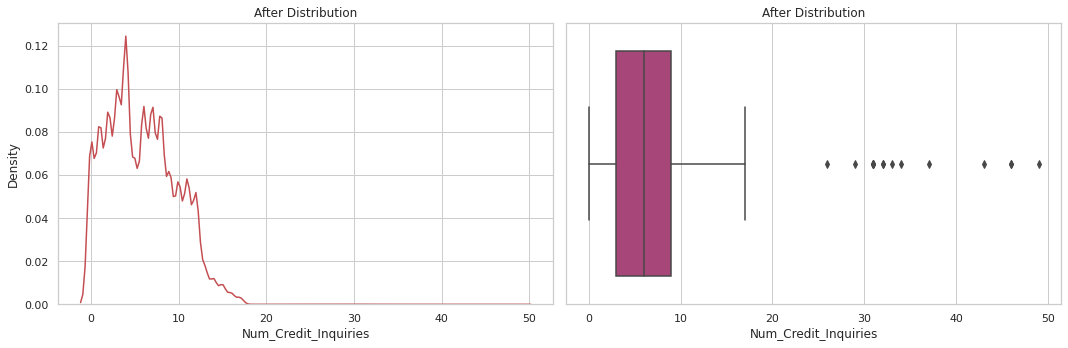

In [64]:
Distribution2(columne='Num_Credit_Inquiries',data=data,i=1)

### Credit_History_Age

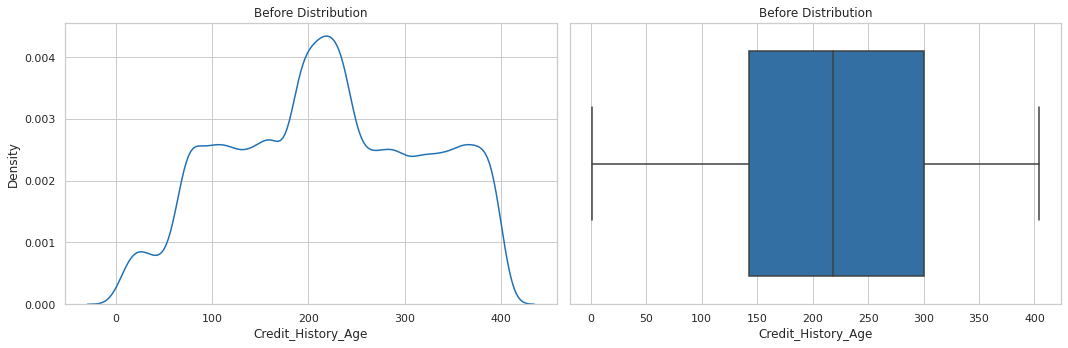

In [65]:
Distribution2(columne='Credit_History_Age',data=data,i=0)

In [66]:
def get_Credit_History_Age(row):
    if pd.isnull(row['Credit_History_Age']):
        Credit_History_Age=(data[data['Customer_ID']==row['Customer_ID']]['Credit_History_Age'].dropna()).mode()
        try:
            return Credit_History_Age[0]
        except:
            return np.NaN
    else:
        return row['Credit_History_Age']

In [67]:
data['Credit_History_Age']=data.apply(get_Credit_History_Age,axis=1)

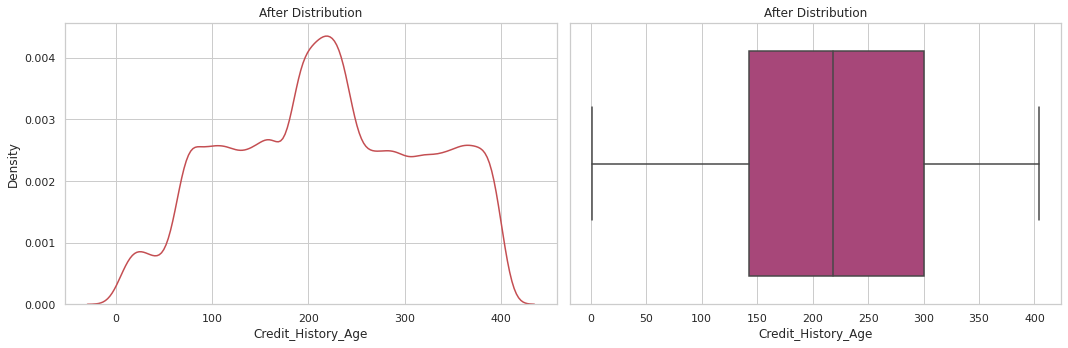

In [68]:
Distribution2(columne='Credit_History_Age',data=data,i=1)

### Amount_invested_monthly

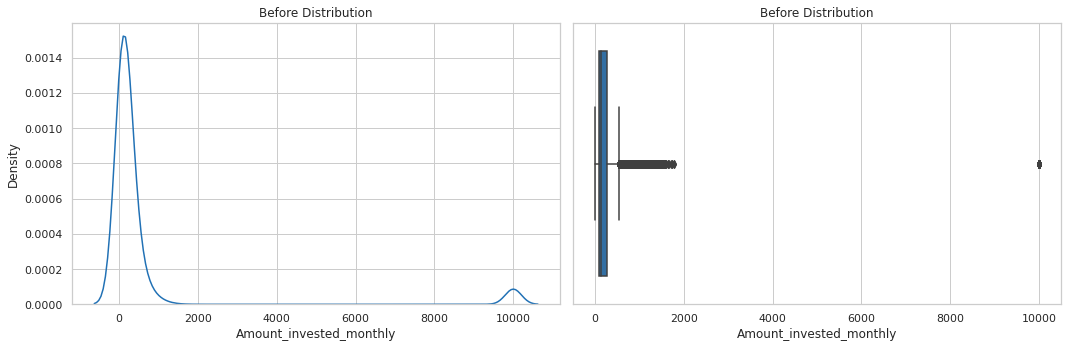

In [69]:
Distribution2(columne='Amount_invested_monthly',data=data,i=0)

In [70]:
def get_Amount_invested_monthly(row):
    if pd.isnull(row['Amount_invested_monthly']):
        Amount_invested_monthly=(data[data['Customer_ID']==row['Customer_ID']]['Amount_invested_monthly'].dropna()).mode()
        try:
            return Amount_invested_monthly[0]
        except:
            return np.NaN
    else:
        return row['Amount_invested_monthly']

In [71]:
data['Amount_invested_monthly']=data.apply(get_Amount_invested_monthly,axis=1)

In [72]:
print(data[data['Amount_invested_monthly']>=1000].shape)
data=data[data['Amount_invested_monthly']<1000]

(4907, 27)


In [73]:
data.shape

(90642, 27)

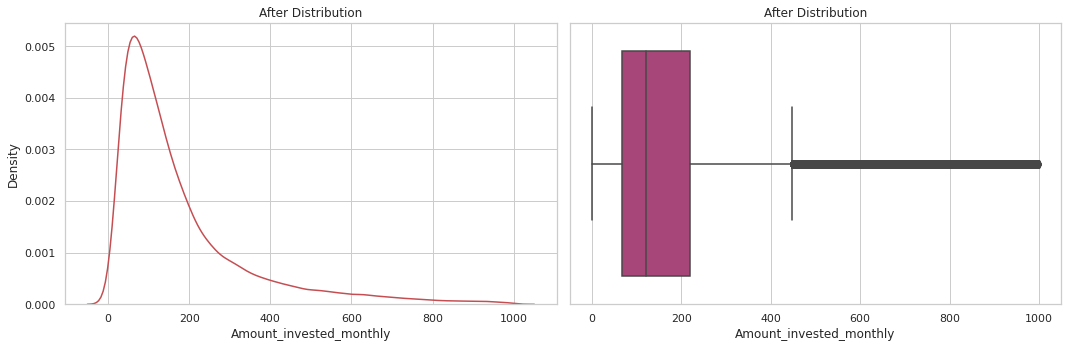

In [74]:
Distribution2(columne='Amount_invested_monthly',data=data,i=1)

### Monthly_Balance

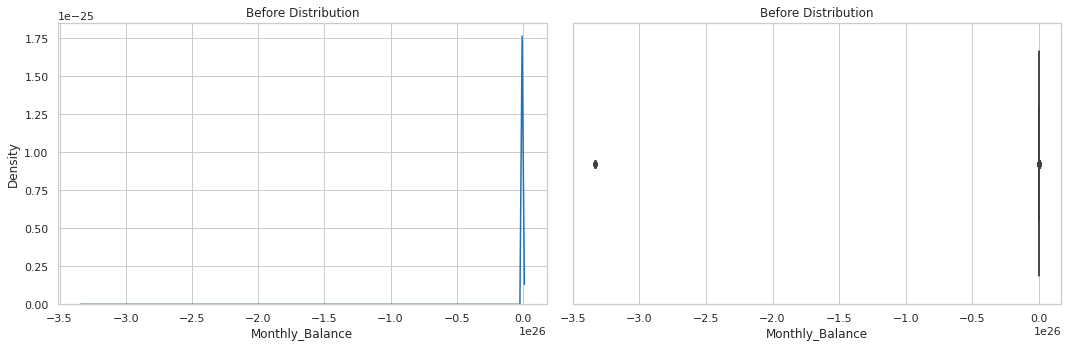

In [75]:
Distribution2(columne='Monthly_Balance',data=data,i=0)

In [76]:
def get_Monthly_Balance(row):
    if pd.isnull(row['Monthly_Balance']):
        Monthly_Balance=(data[data['Customer_ID']==row['Customer_ID']]['Monthly_Balance'].dropna()).mode()
        try:
            return Monthly_Balance[0]
        except:
            return np.NaN
    else:
        return row['Monthly_Balance']

In [77]:
data['Monthly_Balance']=data.apply(get_Monthly_Balance,axis=1)

In [78]:
print(data[data['Monthly_Balance'] <= 0].shape)
data = data[data['Monthly_Balance'] > 0]

(9, 27)


In [79]:
data.shape

(90633, 27)

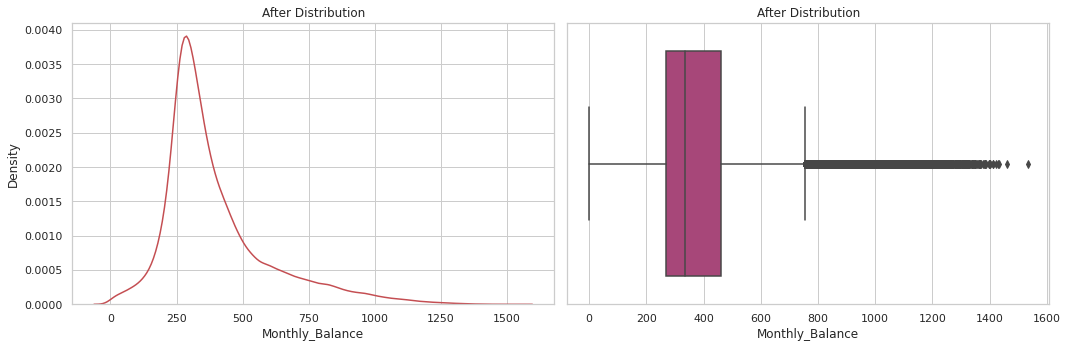

In [80]:
Distribution2(columne='Monthly_Balance',data=data,i=1)

 ____

In [81]:
missing_columns=data.isnull().sum()
miss_num_columns = list(data[(missing_columns[missing_columns > 0]).index].select_dtypes(include=["int64","float64"]).columns)
miss_num_columns

[]

---

In [82]:
columns_with_missing_values(data)

Name                  9035
Occupation            6395
Type_of_Loan         10220
Credit_Mix           18297
Payment_Behaviour     6894
dtype: int64

In [83]:
miss_object_columns=list(df[(missing_columns[missing_columns > 0]).index].select_dtypes(include='object').columns)
miss_object_columns

['Name', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_Behaviour']

### Occupation

In [84]:
def get_Occupation(row):
    if pd.isnull(row['Occupation']):
        Occupation=(data[data['Customer_ID']==row['Customer_ID']]['Occupation'].dropna()).mode()
        try:
            return Occupation[0]
        except:
            return np.NaN
    else:
        return row['Occupation']

In [85]:
data['Occupation']=data.apply(get_Occupation,axis=1)

In [86]:
data[data['Occupation'].isnull()]

,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


In [87]:
data['Occupation'] = data['Occupation'].fillna(data['Occupation'].mode()[0])

In [88]:
len(data[data['Occupation'].isnull()])

0

### Type_of_Loan

In [89]:
data.head(2)

,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,January,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.27,4.0,NaN,809.98,26.82262,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,February,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4.0,11.27,4.0,Good,809.98,31.94496,265.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good


In [90]:
data['Type_of_Loan'] = data['Type_of_Loan'].fillna('Not Specified')

In [91]:
def get_Diff_Values_Colum(df_data):
    valu=['Auto Loan','Credit-Builder Loan','Debt Consolidation Loan','Home Equity Loan','Mortgage Loan','Not Specified',
          'Payday Loan','Personal Loan','Student Loan']
    for x in valu:
        df_data[x] = np.NAN
        
    index=0
    for i in df_data['Type_of_Loan']:
        diff_value=[]
        if  ',' not in i:
            diff_value.append(i.strip())
        else:
            for data in map(lambda x:x.strip(), i.replace('and','').split(',')):
                if not data in diff_value:
                    diff_value.append(data)
        
        for x in valu:
            if x in diff_value:
                df_data[x].iloc[index]=1
        index=index+1
        
    for x in valu:
        df_data[x] = df_data[x].fillna(0)
        df_data[x] = df_data[x].astype(int) 
    return df_data

data=get_Diff_Values_Colum(data)

In [92]:
data.drop('Type_of_Loan',axis=1,inplace=True)

In [93]:
data.head(2)

,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
0,5634,3392,January,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,4.0,NaN,809.98,26.82262,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,1,1,0,1,0,0,0,1,0
1,5635,3392,February,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,4,-1,4.0,11.27,4.0,Good,809.98,31.94496,265.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,1,1,0,1,0,0,0,1,0


## Credit_Mix

In [94]:
def get_Credit_Mix(row):
    if pd.isnull(row['Credit_Mix']):
        Credit_Mix=(data[data['Customer_ID']==row['Customer_ID']]['Credit_Mix'].dropna()).mode()
        try:
            return Credit_Mix[0]
        except:
            return np.NaN
    else:
        return row['Credit_Mix']

In [95]:
data['Credit_Mix']=data.apply(get_Credit_Mix,axis=1)

In [96]:
data['Credit_Mix'] = data['Credit_Mix'].fillna(data['Credit_Mix'].mode()[0])

In [97]:
len(data[data['Credit_Mix'].isnull()])

0

## Payment_Behaviour

In [98]:
def get_Payment_Behaviour(row):
    if pd.isnull(row['Payment_Behaviour']):
        Payment_Behaviour=(data[data['Customer_ID']==row['Customer_ID']]['Payment_Behaviour'].dropna()).mode()
        try:
            return Payment_Behaviour[0]
        except:
            return np.NaN
    else:
        return row['Payment_Behaviour']

In [99]:
data['Payment_Behaviour']=data.apply(get_Payment_Behaviour,axis=1)

In [100]:
data['Payment_Behaviour'] = data['Payment_Behaviour'].fillna(data['Payment_Behaviour'].mode()[0])

In [101]:
len(data[data['Payment_Behaviour'].isnull()])

0

 ----

In [102]:
columns_with_missing_values(data)

Name    9035
dtype: int64

----

In [103]:
num_columns = list(data.select_dtypes(include=["int64","float64",'int32']).columns)
num_columns=num_columns[2:-9]

In [104]:
process=['Monthly_Inhand_Salary','Num_of_Delayed_Payment','Changed_Credit_Limit','Num_Credit_Inquiries',
         'Credit_History_Age','Amount_invested_monthly','Monthly_Balance']

In [105]:
for i in num_columns:
    if i not in process:
        print(i)

Age
Annual_Income
Num_Bank_Accounts
Num_Credit_Card
Interest_Rate
Num_of_Loan
Delay_from_due_date
Outstanding_Debt
Credit_Utilization_Ratio
Total_EMI_per_month


## Age

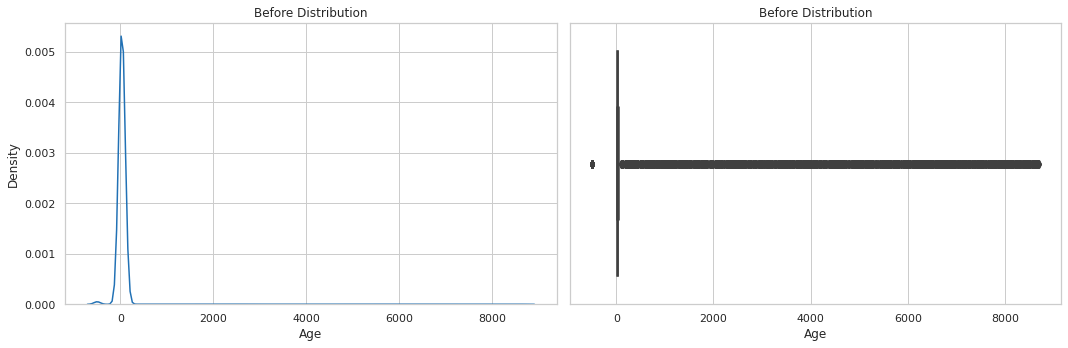

In [106]:
Distribution2(columne='Age',data=data,i=0)

In [107]:
print(data[data['Age'] > 60].shape)

(1714, 35)


In [108]:
def get_age(row):
    if (60 < row['Age']) or (0 > row['Age']) :
        Age=(data[data['Customer_ID']==row['Customer_ID']]['Age'].dropna()).mode()
        try:
            return Age[0]
        except:
            return np.NaN
    else:
        return row['Age']

In [109]:
data['Age']=data.apply(get_age,axis=1)

In [110]:
data[data['Age'] > 60].sort_values('Age')

,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan


In [111]:
data.drop(data[data['Age'] > 60].index,axis=0,inplace=True)

In [112]:
data[data['Age'] < 0].sort_values('Age')

,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
45664,74130,28583,January,Groomp,-500,Developer,99403.32,8347.61,0,3,11,3,9,9.0,0.72,1.0,Good,904.93,40.884276,280.0,No,130.619711,325.109918,High_spent_Medium_value_payments,629.031372,Good,0,0,0,1,1,0,1,0,0
45665,74131,28583,February,Groomp,-500,Developer,99403.32,8347.61,0,3,11,3,5,9.0,0.72,1.0,Good,904.93,28.185199,281.0,No,130.619711,308.567185,High_spent_Medium_value_payments,645.574105,Good,0,0,0,1,1,0,1,0,0
45669,74135,28583,June,Groomp,-500,Developer,99403.32,8347.61,0,3,11,3,8,9.0,0.72,1.0,Good,904.93,34.870185,285.0,No,130.619711,426.690980,Low_spent_Medium_value_payments,557.450309,Standard,0,0,0,1,1,0,1,0,0
45671,74137,28583,August,Groomp,-500,Developer,99403.32,8347.61,0,3,11,3,9,9.0,0.72,1.0,Good,904.93,39.074470,287.0,No,130.619711,118.730491,High_spent_Medium_value_payments,835.410798,Standard,0,0,0,1,1,0,1,0,0


In [113]:
data.drop(data[data['Age']  < 0].index,axis=0,inplace=True)

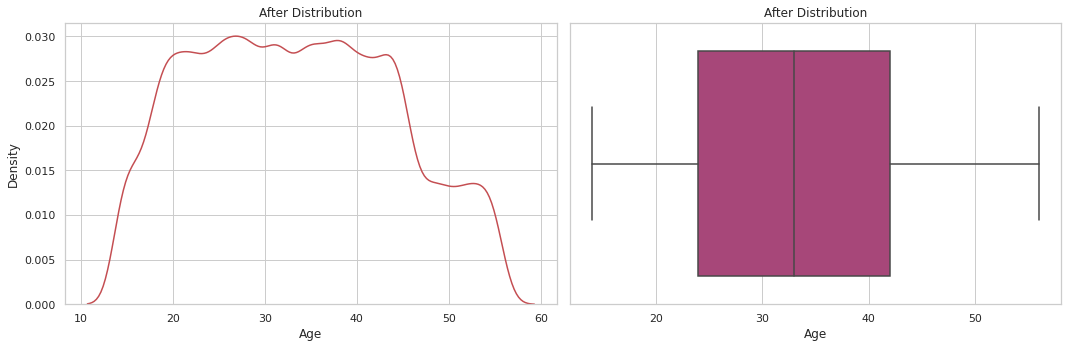

In [114]:
Distribution2(columne='Age',data=data,i=1)

## Annual_Income

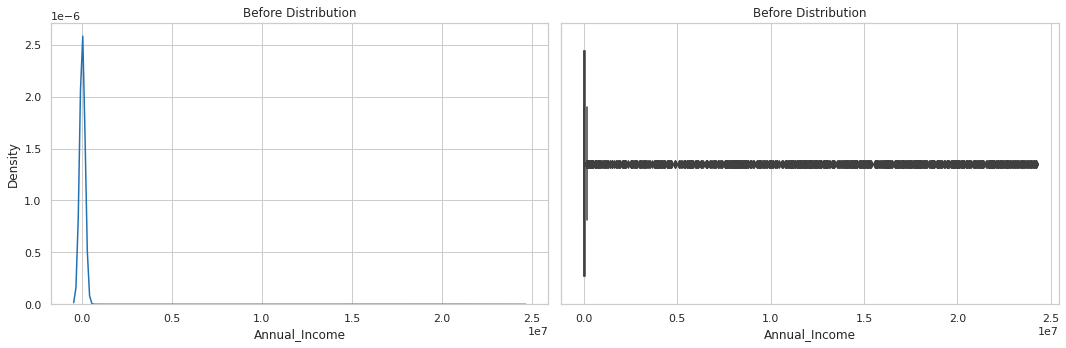

In [115]:
Distribution2(columne='Annual_Income',data=data,i=0)

In [116]:
def get_Annual_Income(row):
    if 150000 < row['Annual_Income'] :
        Annual_Income=(data[data['Customer_ID']==row['Customer_ID']]['Annual_Income'].dropna()).mode()
        try:
            return Annual_Income[0]
        except:
            return np.NaN
    else:
        return row['Annual_Income']

In [117]:
data['Annual_Income']=data.apply(get_Annual_Income,axis=1)

In [118]:
data[data['Annual_Income'] > 165000].sort_values('Annual_Income')

,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
56581,90503,15769,June,NaN,46,Accountant,167258.04,12986.315524,5,2,12,0,13,1.0,10.72,2.0,Good,476.64,29.757926,324.0,No,1213.854476,608.969535,Low_spent_Large_value_payments,1081.047465,Good,0,0,0,0,0,1,0,0,0
56582,90504,15769,July,Lionel Laurentb,46,Accountant,167258.04,12986.315524,566,2,12,0,13,1.0,10.72,2.0,Good,476.64,45.109866,325.0,No,1213.854476,464.293793,Low_spent_Large_value_payments,1205.723207,Good,0,0,0,0,0,1,0,0,0
56583,90505,15769,August,Lionel Laurentb,46,Accountant,167258.04,12986.315524,5,1123,12,0,13,0.0,10.72,2.0,Good,476.64,26.568010,324.0,No,1213.854476,963.127698,Low_spent_Large_value_payments,726.889302,Good,0,0,0,0,0,1,0,0,0
36013,59651,21693,June,Nick Edwardsv,26,Journalist,167753.52,13102.045569,3,3,12,3,7,7.0,4.62,2.0,Good,1079.59,41.106992,349.0,No,1190.730221,225.515481,High_spent_Large_value_payments,1160.714729,Good,0,0,0,0,1,1,0,1,0
35477,58847,41452,June,Danielr,51,Teacher,171292.56,12574.940065,1,5,9,3,3,1.0,5.49,4.0,Good,393.01,45.132045,381.0,No,1779.103254,398.840854,Low_spent_Large_value_payments,994.533827,Good,1,0,1,0,0,0,1,0,0
35478,58848,41452,July,Danielr,51,Teacher,171292.56,12574.940065,1,5,9,-100,6,4.0,5.49,4.0,Good,393.01,31.889407,387.0,No,1779.103254,327.980626,High_spent_Medium_value_payments,1045.394055,Standard,1,0,1,0,0,0,1,0,0
35479,58849,41452,August,Danielr,52,Teacher,171292.56,12574.940065,1,5,9,3,3,1.0,5.49,4.0,Good,393.01,40.146312,388.0,No,1779.103254,503.449545,High_spent_Medium_value_payments,869.925136,Good,1,0,1,0,0,0,1,0,0
9378,19700,13909,March,Ransdellw,29,Lawyer,177907.72,13078.430052,0,6,6,0,8,10.0,10.76,0.0,Good,685.01,40.275432,369.0,No,1634.213281,668.401726,Low_spent_Large_value_payments,1072.862608,Poor,0,0,0,0,0,1,0,0,0
9379,19701,13909,April,Ransdellw,29,Lawyer,177907.72,13078.430052,0,6,6,0,8,8.0,10.76,0.0,Good,685.01,44.798586,370.0,No,1634.213281,291.345581,High_spent_Medium_value_payments,1429.918752,Standard,0,0,0,0,0,1,0,0,0
9380,19702,13909,May,Ransdellw,29,Lawyer,177907.72,13078.430052,0,6,6,0,7,8.0,16.76,0.0,Good,685.01,33.439295,371.0,No,1634.213281,463.706400,High_spent_Small_value_payments,1267.557933,Standard,0,0,0,0,0,1,0,0,0


In [119]:
data.drop(data[data['Annual_Income']  > 165000].index,axis=0,inplace=True)

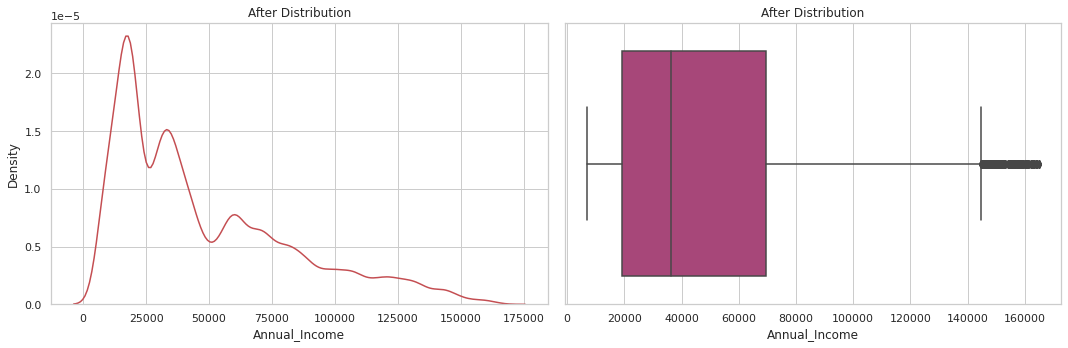

In [120]:
Distribution2(columne='Annual_Income',data=data,i=1)

## Num_Bank_Accounts

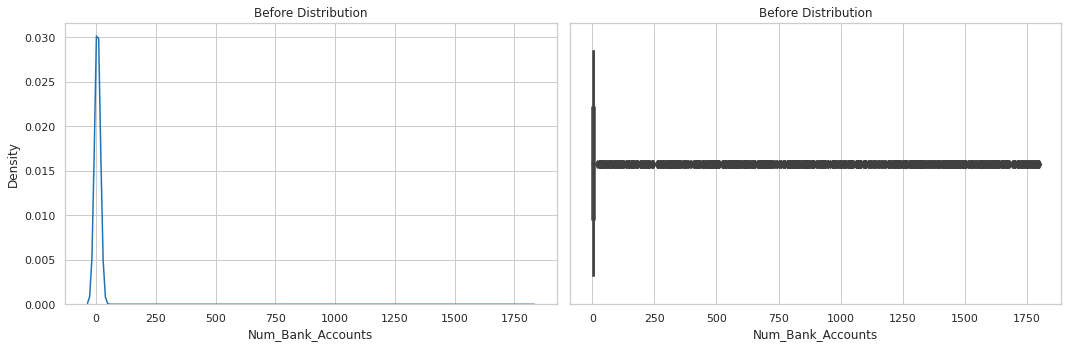

In [121]:
Distribution2(columne='Num_Bank_Accounts',data=data,i=0)

In [122]:
def get_Num_Bank_Accounts(row):
    if 12 < row['Num_Bank_Accounts'] :
        Num_Bank_Accounts=(data[data['Customer_ID']==row['Customer_ID']]['Num_Bank_Accounts'].dropna()).mode()
        try:
            return Num_Bank_Accounts[0]
        except:
            return np.NaN
    else:
        return row['Num_Bank_Accounts']

In [123]:
data['Num_Bank_Accounts']=data.apply(get_Num_Bank_Accounts,axis=1)

In [124]:
data[data['Num_Bank_Accounts'] > 12]

,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan


In [125]:
data.drop(data[data['Num_Bank_Accounts']  > 12].index,axis=0,inplace=True)
data.drop(data[data['Num_Bank_Accounts']  < 0].index,axis=0,inplace=True)

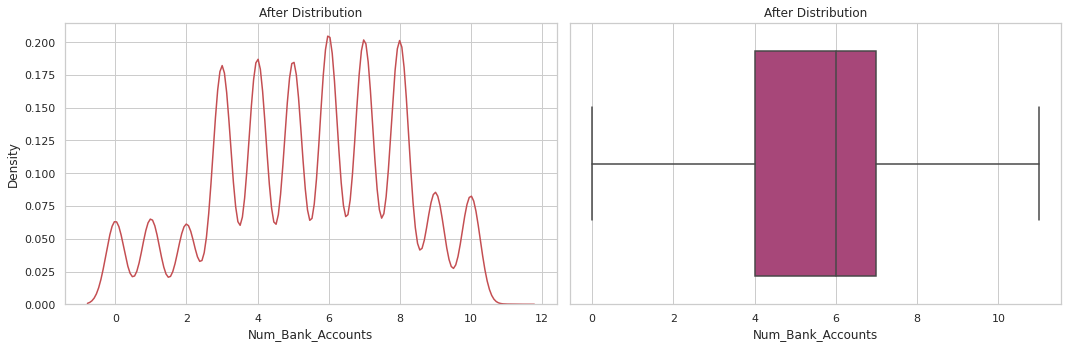

In [126]:
Distribution2(columne='Num_Bank_Accounts',data=data,i=1)

## Num_Credit_Card

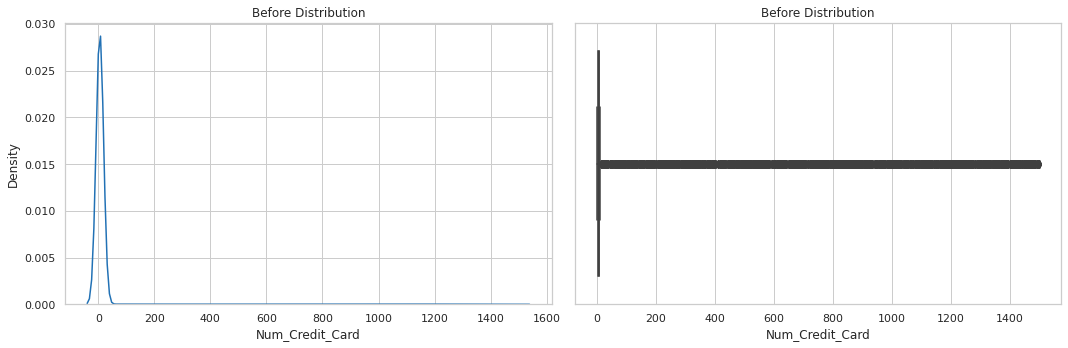

In [127]:
Distribution2(columne='Num_Credit_Card',data=data,i=0)

In [128]:
data[data['Num_Credit_Card'] > 14]

,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
40,5694,38382,January,Np,31,Lawyer,73928.46,5988.705000,4,1288,8,0,12,10.0,10.14,2.0,Good,548.20,39.962685,384.0,No,15015.000000,98.674410,High_spent_Large_value_payments,740.196090,Good,0,0,0,0,0,1,0,0,0
157,5867,16640,June,Reema,32,Entrepreneur,19300.34,1512.361667,6,1029,17,5,51,17.0,9.95,8.0,Bad,2430.21,25.847791,223.0,Yes,49.572062,83.447449,Low_spent_Large_value_payments,288.216656,Poor,1,0,1,0,1,1,1,0,0
163,5877,4911,April,NaN,41,Musician,19514.88,1828.240000,7,488,17,0,30,12.0,4.17,2.0,Standard,881.40,34.503707,234.0,No,0.000000,45.388820,High_spent_Medium_value_payments,387.435180,Poor,0,0,0,0,0,1,0,0,0
207,5941,19779,August,Reijik,48,Entrepreneur,20787.69,1999.307500,8,1381,14,3,22,14.0,8.13,3.0,Standard,614.60,35.344188,221.0,No,42.221993,21.745531,High_spent_Large_value_payments,375.963226,Standard,0,1,0,1,0,0,0,0,0
215,5953,47455,August,Ashleyk,30,Writer,34290.12,2697.510000,9,898,25,7,52,9.0,13.96,13.0,Standard,2686.81,36.820649,171.0,Yes,185.111983,94.917216,High_spent_Small_value_payments,249.721801,Poor,1,1,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99605,155039,23917,June,Martinb,38,Writer,126514.72,10341.893333,8,1255,5,3,21,19.0,10.64,0.0,Standard,470.42,29.696182,355.0,No,61447.000000,902.340388,Low_spent_Small_value_payments,109.816092,Good,1,1,0,1,0,0,0,0,0
99611,155049,10281,April,Alistair Barre,31,Journalist,64901.37,5298.447500,3,514,20,-100,14,15.0,2.94,0.0,Standard,442.06,29.639741,373.0,Yes,0.000000,162.171160,High_spent_Medium_value_payments,617.673590,Standard,0,0,0,0,0,1,0,0,0
99615,155053,10281,August,Alistair Barre,32,Journalist,64901.37,5298.447500,3,232,20,0,19,18.0,2.94,3.0,Standard,442.06,29.145534,377.0,Yes,0.000000,126.263036,High_spent_Large_value_payments,643.581714,Standard,0,0,0,0,0,1,0,0,0
99619,155061,44646,April,Jino,30,Writer,142560.36,11773.030000,6,1430,13,1,23,15.0,11.22,0.0,Standard,220.75,34.671699,210.0,No,76.772094,982.946968,Low_spent_Large_value_payments,387.583938,Standard,0,0,0,0,0,0,0,0,1


In [129]:
def get_Num_Credit_Card(row):
    if 14 < row['Num_Credit_Card'] :
        Num_Credit_Card=(data[data['Customer_ID']==row['Customer_ID']]['Num_Credit_Card'].dropna()).mode()
        try:
            return Num_Credit_Card[0]
        except:
            return np.NaN
    else:
        return row['Num_Credit_Card']

In [130]:
data['Num_Credit_Card']=data.apply(get_Num_Credit_Card,axis=1)

In [131]:
data.drop(data[data['Num_Credit_Card']  > 14].index,axis=0,inplace=True)

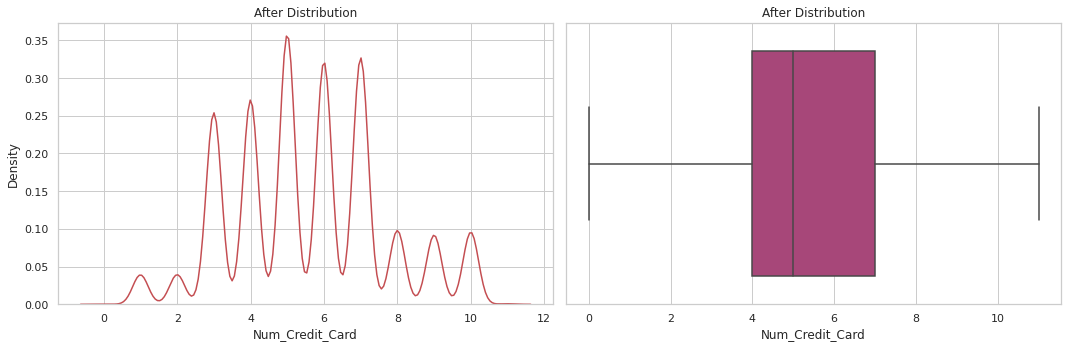

In [132]:
Distribution2(columne='Num_Credit_Card',data=data,i=1)

## Interest_Rate

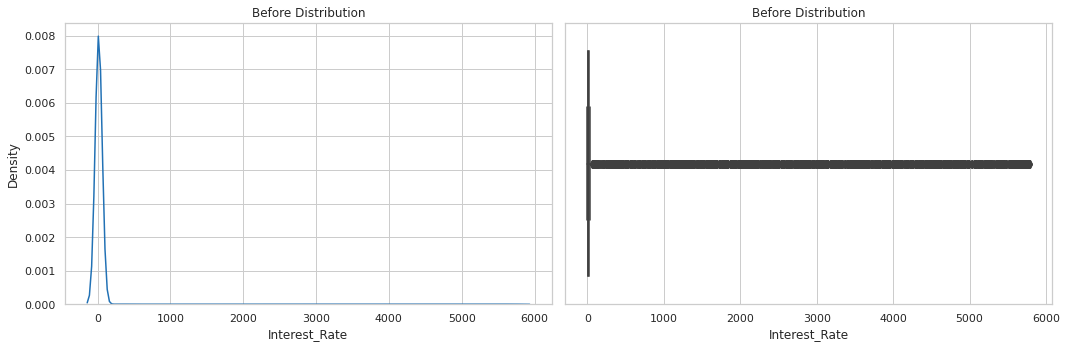

In [133]:
Distribution2(columne='Interest_Rate',data=data,i=0)

In [134]:
data[data['Interest_Rate'] > 35].sort_values('Interest_Rate')

,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
35442,58796,24464,March,NaN,15,Engineer,12680.815,1334.734583,4,5,59,0,26,11.0,8.79,6.0,Standard,704.18,33.487750,212.0,Yes,0.000000,34.169408,High_spent_Large_value_payments,339.304050,Standard,0,0,0,0,0,1,0,0,0
57905,92491,24226,February,Julien Toyerf,36,Entrepreneur,17869.290,1643.107500,6,3,60,4,30,13.0,10.20,2.0,Standard,276.09,38.310862,324.0,Yes,42.042420,127.532913,Low_spent_Large_value_payments,264.735417,Standard,1,0,0,0,0,1,1,0,0
61480,97854,28633,January,Julien Toyerq,35,Journalist,84050.500,7140.208333,3,5,64,3,2,0.0,7.16,1.0,Good,889.05,31.731434,287.0,No,175.377781,124.043048,High_spent_Large_value_payments,654.600004,Good,0,0,0,1,0,0,0,0,1
18907,33993,23687,April,Lisaz,39,Developer,76395.280,6074.273333,9,8,67,5,21,20.0,22.94,10.0,Bad,3026.97,39.686331,110.0,Yes,208.769613,70.252845,High_spent_Large_value_payments,570.419750,Standard,0,1,0,1,1,1,0,0,0
2648,9606,30096,January,Malathi Nayakw,43,Architect,68665.760,5619.146667,7,6,73,7,6,20.0,7.05,8.0,Standard,420.02,38.630616,145.0,Yes,329.666062,315.972607,Low_spent_Medium_value_payments,196.275998,Standard,0,1,0,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86815,135853,10886,August,Lesleyk,36,Accountant,50817.900,4531.825000,3,6,5774,2,16,15.0,17.05,12.0,Standard,2368.19,39.867715,105.0,NM,47.537232,79.419019,High_spent_Medium_value_payments,576.226249,Poor,0,0,0,1,0,0,0,0,1
77710,122196,9668,July,Zieminskia,40,Accountant,14717.280,1069.440000,5,2,5775,3,9,9.0,5.89,3.0,Good,148.52,28.221988,257.0,No,58962.000000,17.478496,High_spent_Large_value_payments,298.381784,Standard,0,0,0,1,0,0,0,0,1
88505,138391,6568,February,NaN,42,Musician,30683.420,2397.951667,4,6,5776,2,27,6.0,10.62,4.0,Standard,7.24,29.706823,310.0,No,46.884456,64.523403,High_spent_Medium_value_payments,378.387307,Standard,0,0,1,0,0,1,0,0,0
23512,40902,12203,January,Anna Yukhananovd,26,Manager,75804.940,6120.078333,0,1,5788,3,9,8.0,7.89,2.0,Good,330.82,35.641926,381.0,No,141.289448,51.867242,High_spent_Large_value_payments,658.851143,Good,0,1,0,1,1,0,0,0,0


In [135]:
def get_Interest_Rate(row):
    if 35 < row['Interest_Rate'] :
        Interest_Rate=(data[data['Customer_ID']==row['Customer_ID']]['Interest_Rate'].dropna()).mode()
        try:
            return Interest_Rate[0]
        except:
            return np.NaN
    else:
        return row['Interest_Rate']

In [136]:
data['Interest_Rate']=data.apply(get_Interest_Rate,axis=1)

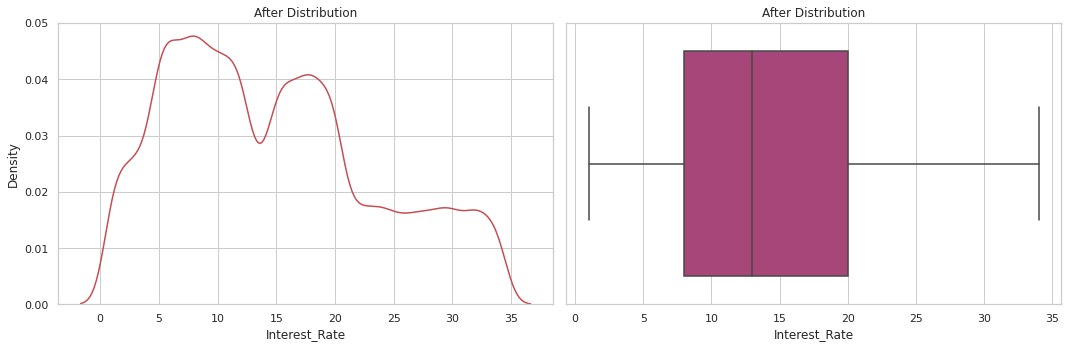

In [137]:
Distribution2(columne='Interest_Rate',data=data,i=1)

## Num_of_Loan

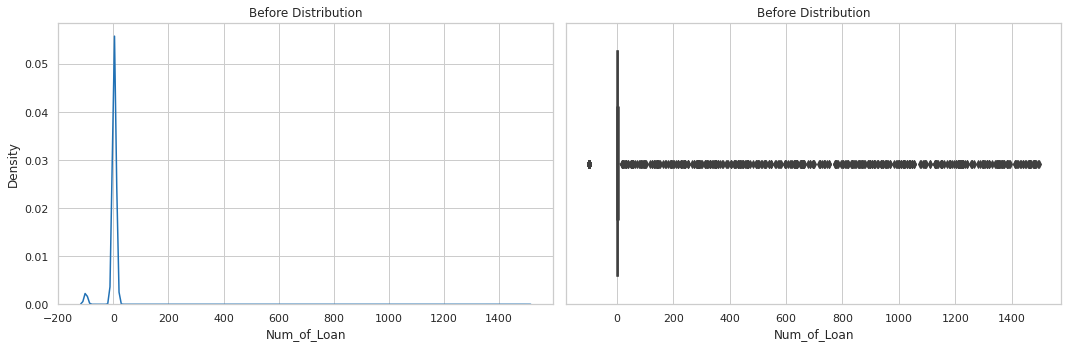

In [138]:
Distribution2(columne='Num_of_Loan',data=data,i=0)

In [139]:
def get_Num_of_Loan(row):
    if (8 < row['Num_of_Loan']) or (0 > row['Num_of_Loan']):
        Num_of_Loan=(data[data['Customer_ID']==row['Customer_ID']]['Num_of_Loan'].dropna()).mode()
        try:
            return Num_of_Loan[0]
        except:
            return np.NaN
    else:
        return row['Num_of_Loan']

In [140]:
data['Num_of_Loan']=data.apply(get_Num_of_Loan,axis=1)

In [141]:
data.drop(data[data['Num_of_Loan']  < 0].index,axis=0,inplace=True)

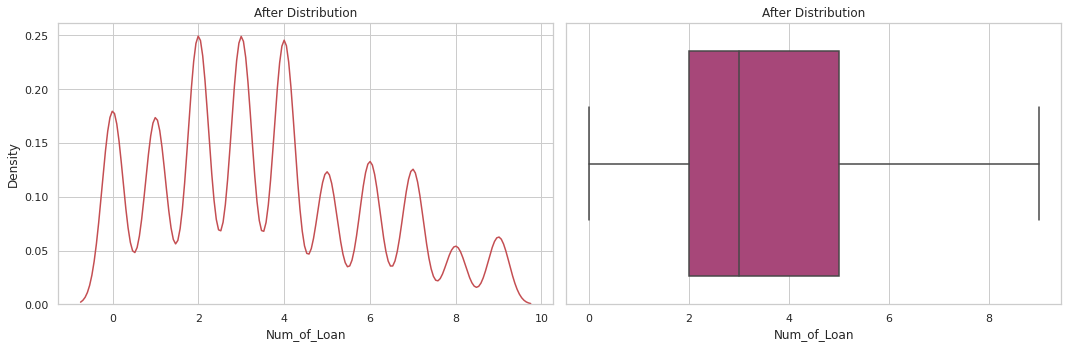

In [142]:
Distribution2(columne='Num_of_Loan',data=data,i=1)

## Delay_from_due_date

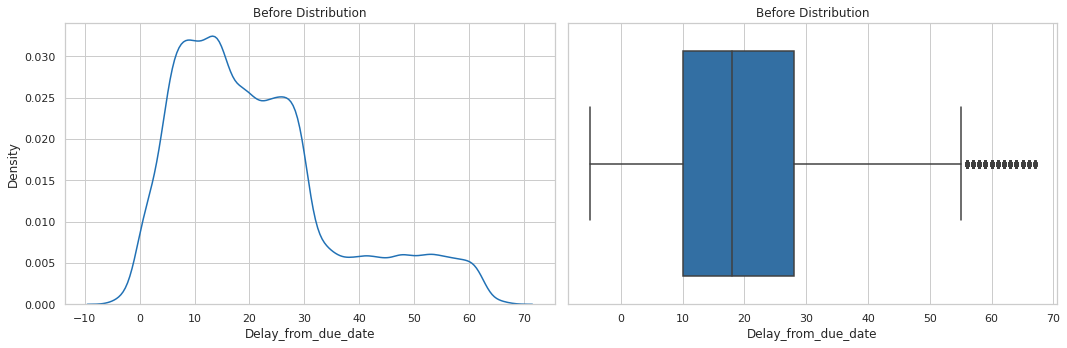

In [143]:
Distribution2(columne='Delay_from_due_date',data=data,i=0)

## Outstanding_Debt

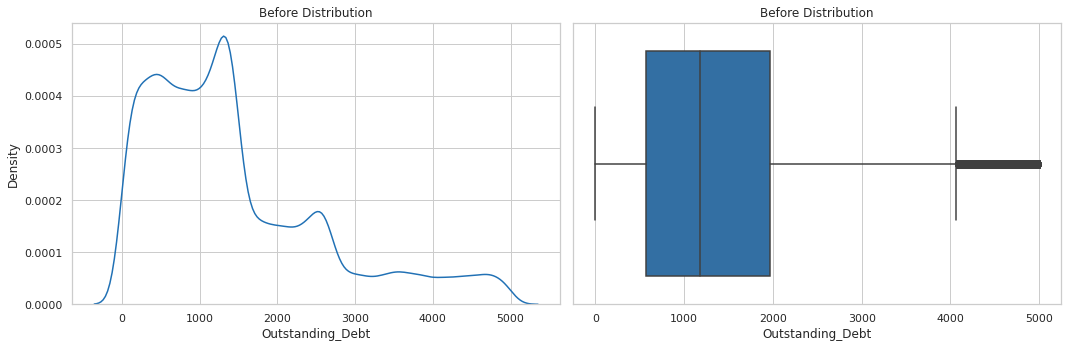

In [144]:
Distribution2(columne='Outstanding_Debt',data=data,i=0)

## Credit_Utilization_Ratio

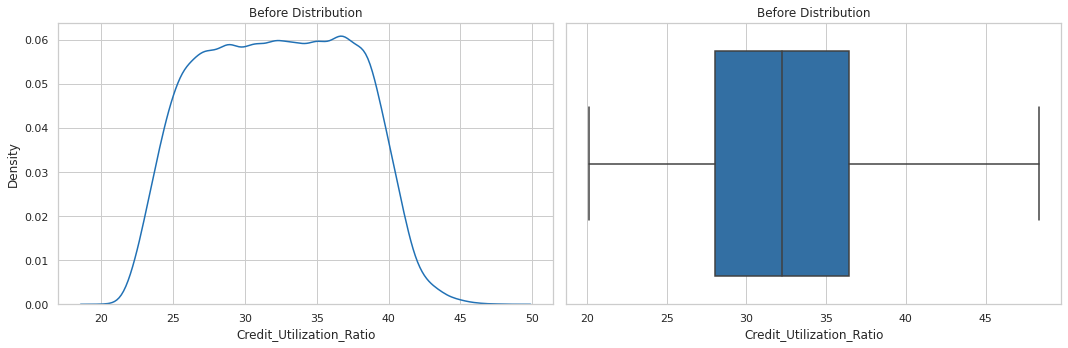

In [145]:
Distribution2(columne='Credit_Utilization_Ratio',data=data,i=0)

## Total_EMI_per_month

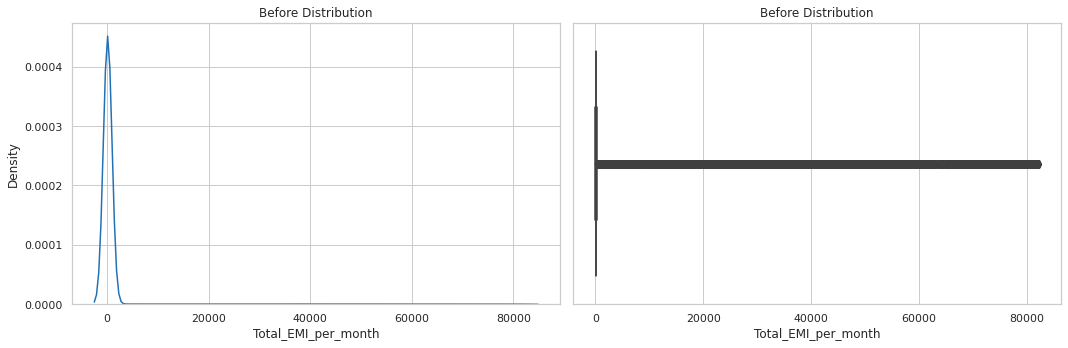

In [146]:
Distribution2(columne='Total_EMI_per_month',data=data,i=0)

In [147]:
data=data[data['Total_EMI_per_month']<5000]

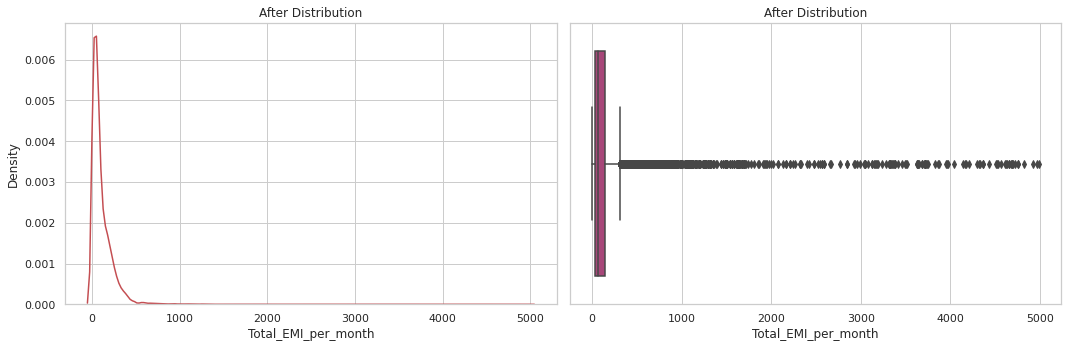

In [148]:
Distribution2(columne='Total_EMI_per_month',data=data,i=1)

In [149]:
data.shape

(87865, 35)

## Save process DATA to CSV

In [150]:
data.head(3)

,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
0,5634,3392,January,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,1,1,0,1,0,0,0,1,0
1,5635,3392,February,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,4,-1,4.0,11.27,4.0,Good,809.98,31.944960,265.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,1,1,0,1,0,0,0,1,0
2,5636,3392,March,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,1,1,0,1,0,0,0,1,0


In [151]:
data.to_csv("./bank_data.csv", index=False)


In [152]:
process_df= pd.read_csv("./bank_data.csv",sep = "," , encoding = "utf-8")

In [153]:
process_df.head(3)

,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
0,5634,3392,January,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,1,1,0,1,0,0,0,1,0
1,5635,3392,February,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,4,-1,4.0,11.27,4.0,Good,809.98,31.944960,265.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,1,1,0,1,0,0,0,1,0
2,5636,3392,March,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,1,1,0,1,0,0,0,1,0


## Drop unimportant columns

In [154]:
def drop_columns(DataFrame):
    lazy_list=['ID','Customer_ID','Name']
    DataFrame.drop(lazy_list, axis=1, inplace=True)
drop_columns(process_df)

## Encoding categorical features

In [155]:
process_df['Month'] = process_df['Month'].map({'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12})

In [156]:
Occupation_le = LabelEncoder()

process_df['Occupation'] = Occupation_le.fit_transform(process_df['Occupation'])
Occupation_le.classes_

array(['Accountant', 'Architect', 'Developer', 'Doctor', 'Engineer',
       'Entrepreneur', 'Journalist', 'Lawyer', 'Manager', 'Mechanic',
       'Media_Manager', 'Musician', 'Scientist', 'Teacher', 'Writer'],
      dtype=object)

In [157]:
Credit_Mix_le = LabelEncoder()

process_df['Credit_Mix'] = Credit_Mix_le.fit_transform(process_df['Credit_Mix'])
Credit_Mix_le.classes_

array(['Bad', 'Good', 'Standard'], dtype=object)

In [158]:
Payment_Behaviour_le = LabelEncoder()

process_df['Payment_Behaviour'] = Payment_Behaviour_le.fit_transform(process_df['Payment_Behaviour'])
Payment_Behaviour_le.classes_

array(['High_spent_Large_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments'], dtype=object)

In [159]:
Payment_of_Min_Amount_le = LabelEncoder()

process_df['Payment_of_Min_Amount'] = Payment_of_Min_Amount_le.fit_transform(process_df['Payment_of_Min_Amount'])
Payment_of_Min_Amount_le.classes_

array(['NM', 'No', 'Yes'], dtype=object)

## Scaling and Split the data

In [160]:
x = process_df.drop('Credit_Score',axis=1)
y = process_df['Credit_Score']

In [161]:
y_le = LabelEncoder()

y_Encode = y_le.fit_transform(y)
y_le.classes_

array(['Good', 'Poor', 'Standard'], dtype=object)

In [162]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [163]:
pca = PCA(n_components=0.98)
x_reduced = pca.fit_transform(x)
print("Number of original features is {} and of reduced features is {}".format(x.shape[1], x_reduced.shape[1]))

Number of original features is 31 and of reduced features is 22


## Model

In [164]:
evals = dict()
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    evals[str(name)] = [train_accuracy, test_accuracy]
    print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Poor', 'Standard','Good'])

    fig, ax = plt.subplots(figsize=(10,10))
    ax.grid(False)
    cm_display.plot(ax=ax)

In [165]:
def feature_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)
    plt.figure(figsize=(15,8))
    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances for Decision Tree')
    plt.show()

In [166]:
features = process_df.drop(['Credit_Score'] , axis = 1)

## Logistic Regression

In [167]:
from sklearn.linear_model import LogisticRegression

In [168]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state = 1234)

In [169]:
lr = LogisticRegression(C = 100)

In [170]:
lr.fit(x_train , y_train)

LogisticRegression(C=100)

In [171]:
lr_score_train=lr.score(x_train , y_train)
lr_score_train

0.6532964799609788

In [172]:
lr_score_test=lr.score(x_test , y_test)
lr_score_test

0.6524658573596358

Training Accuracy Logistic Regression 65.32964799609789  Test Accuracy Logistic Regression 65.24658573596358


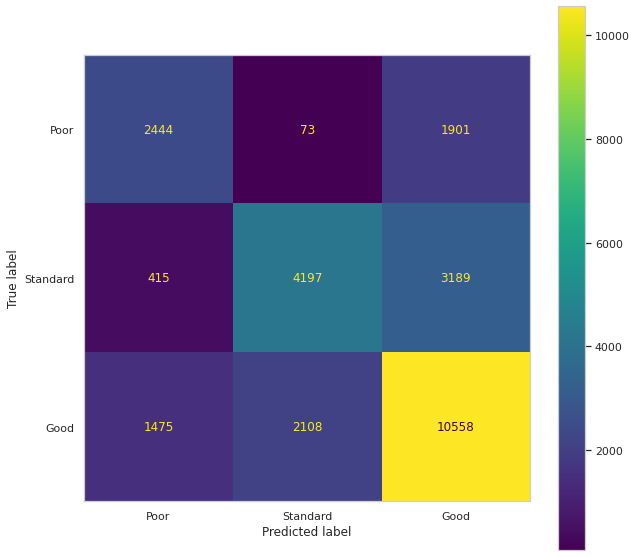

In [173]:
evaluate_classification(lr, "Logistic Regression", x_train, x_test, y_train, y_test)

In [174]:
Y_pred=lr.predict(x_test)

In [175]:
pd.DataFrame((lr.coef_).T ,process_df.drop('Credit_Score',axis=1).columns ).T

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
0,0.347759,0.205572,-0.065549,0.654897,-0.838963,0.044478,-2.045815,-1.592984,-0.743288,-1.928650,0.997555,0.530727,-2.674831,-1.606653,-1.069813,-0.053693,0.598215,-0.322733,3.175956,0.509882,-0.596950,-0.919276,0.008037,0.053942,0.017635,0.028059,0.085104,0.066357,0.035677,-0.022937,0.007279
1,-0.208443,-0.181548,0.044413,-0.410615,0.843705,-0.206402,1.562010,1.623503,0.299663,1.406634,-3.590348,-1.524251,3.976029,0.455253,0.783770,-0.007167,-0.590838,0.143075,-1.809802,-0.776923,0.597568,0.455526,0.036896,0.011045,0.007227,-0.010641,-0.023984,-0.024824,0.007681,0.014926,0.049894
2,-0.139316,-0.024024,0.021136,-0.244282,-0.004741,0.161924,0.483804,-0.030519,0.443625,0.522016,2.592793,0.993524,-1.301198,1.151400,0.286043,0.060860,-0.007377,0.179658,-1.366154,0.267040,-0.000618,0.463750,-0.044934,-0.064987,-0.024862,-0.017418,-0.061120,-0.041532,-0.043358,0.008011,-0.057173


In [176]:
data = pd.DataFrame({"Y_test" : y_test , "Y_pred": Y_pred})
data.head(20).T

,5253,48731,16702,68655,57597,69092,67616,66667,43348,40267,47015,43573,3377,33062,73517,66017,10889,85139,27520,3077
Y_test,Standard,Standard,Poor,Good,Poor,Standard,Standard,Poor,Standard,Standard,Standard,Poor,Good,Standard,Poor,Standard,Standard,Standard,Good,Poor
Y_pred,Standard,Standard,Poor,Standard,Poor,Standard,Standard,Standard,Standard,Standard,Standard,Standard,Good,Poor,Poor,Standard,Good,Standard,Standard,Standard


## KNN

In [177]:
from sklearn.neighbors import KNeighborsClassifier

In [178]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state = 1234)

In [179]:
knn = KNeighborsClassifier(n_neighbors=7)

In [180]:
knn.fit(x_train , y_train)

KNeighborsClassifier(n_neighbors=7)

In [181]:
knn_score_train=knn.score(x_train , y_train)
knn_score_train

0.8031704739452077

In [182]:
knn_score_test=knn.score(x_test , y_test)
knn_score_test

0.723216995447648

Training Accuracy KNeighborsClassifiern 80.31704739452077  Test Accuracy KNeighborsClassifiern 72.3216995447648


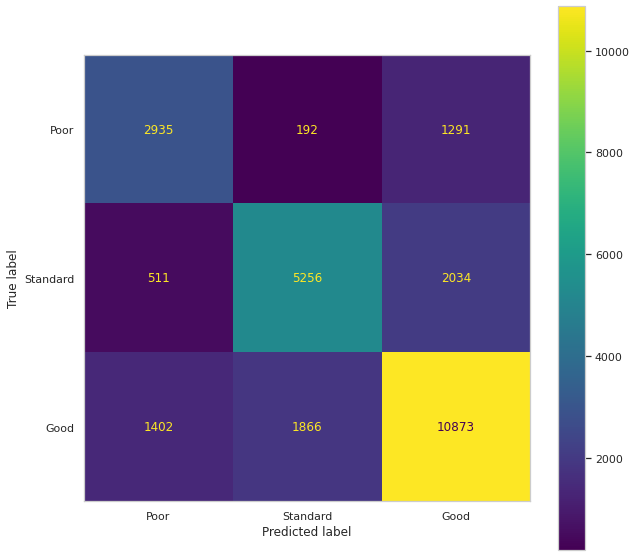

In [183]:
evaluate_classification(knn, "KNeighborsClassifiern", x_train,x_test,y_train,y_test)

In [184]:
Y_pred=knn.predict(x_test)

In [185]:
data = pd.DataFrame({"Y_test" : y_test , "Y_pred": Y_pred})
data.head(20).T

,5253,48731,16702,68655,57597,69092,67616,66667,43348,40267,47015,43573,3377,33062,73517,66017,10889,85139,27520,3077
Y_test,Standard,Standard,Poor,Good,Poor,Standard,Standard,Poor,Standard,Standard,Standard,Poor,Good,Standard,Poor,Standard,Standard,Standard,Good,Poor
Y_pred,Poor,Standard,Poor,Standard,Poor,Standard,Standard,Poor,Good,Standard,Standard,Poor,Good,Poor,Poor,Standard,Good,Poor,Good,Poor


## Decision Tree

In [186]:
from sklearn.tree  import DecisionTreeClassifier

In [187]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state = 1234)

In [188]:
dt =DecisionTreeClassifier(max_features=14 ,    max_depth=12)

In [189]:
dt.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=12, max_features=14)

In [190]:
dt_score_train=dt.score(x_train , y_train)
dt_score_train

0.7639053735468662

In [191]:
dt_score_test=dt.score(x_test , y_test)
dt_score_test

0.7256828528072837

Training Accuracy DecisionTreeClassifier 76.39053735468661  Test Accuracy DecisionTreeClassifier 72.56828528072838


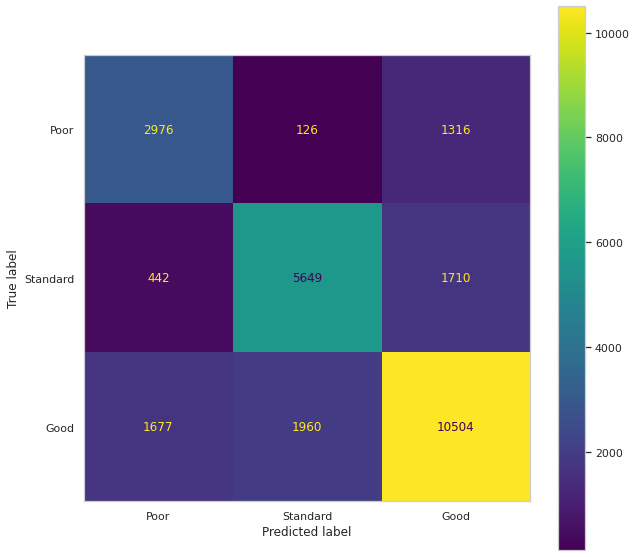

In [192]:
evaluate_classification(dt, "DecisionTreeClassifier", x_train,x_test,y_train,y_test)

In [193]:
Y_pred=dt.predict(x_test)

In [194]:
data = pd.DataFrame({"Y_test" : y_test , "Y_pred": Y_pred})
data.head(20).T

,5253,48731,16702,68655,57597,69092,67616,66667,43348,40267,47015,43573,3377,33062,73517,66017,10889,85139,27520,3077
Y_test,Standard,Standard,Poor,Good,Poor,Standard,Standard,Poor,Standard,Standard,Standard,Poor,Good,Standard,Poor,Standard,Standard,Standard,Good,Poor
Y_pred,Good,Standard,Poor,Standard,Poor,Standard,Standard,Poor,Standard,Standard,Standard,Poor,Good,Poor,Poor,Standard,Good,Standard,Standard,Standard


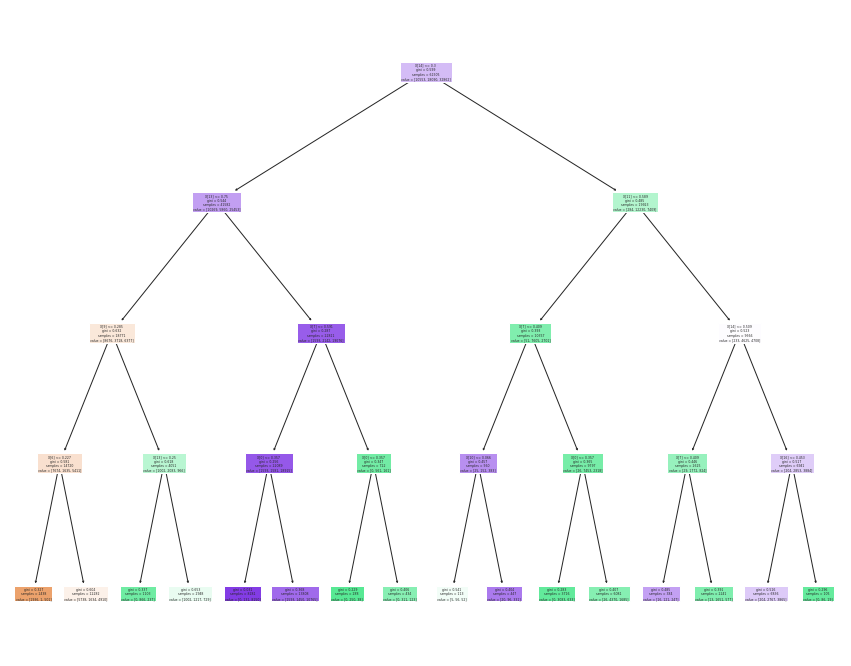

In [195]:
from sklearn import tree

#to a simple plot,We used max depth of 4
dtt = DecisionTreeClassifier(max_depth=4)

dtt.fit(x_train, y_train)
fig = plt.figure(figsize=(15,12))
tree.plot_tree(dtt , filled=True)
plt.show()

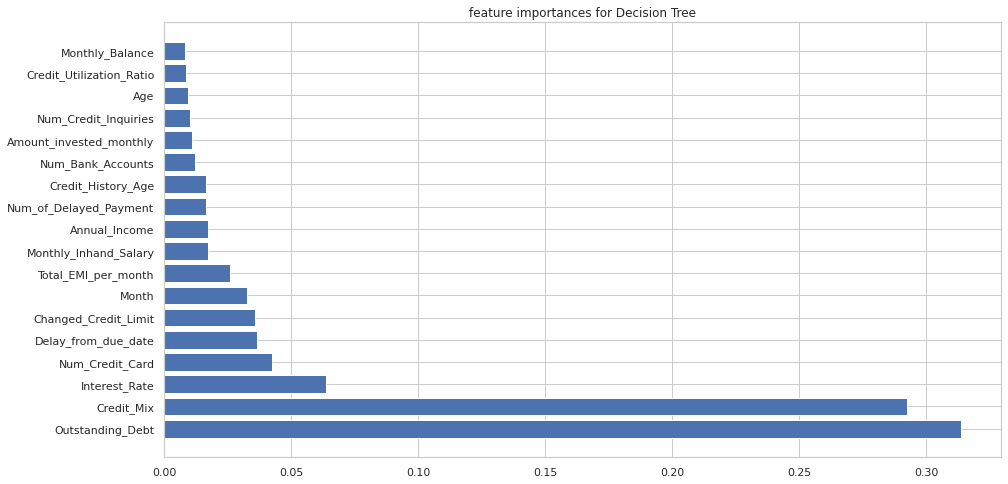

In [196]:
feature_importances(abs(dt.feature_importances_), features, top=18)

## Random forest

In [197]:
from sklearn.ensemble import RandomForestClassifier

In [198]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state = 1234)

In [199]:
rf = RandomForestClassifier(max_features=15 , max_depth=12)

In [200]:
rf.fit(x_train , y_train)

RandomForestClassifier(max_depth=12, max_features=15)

In [201]:
rf_score_train=rf.score(x_train , y_train)
rf_score_train

0.7939517112429884

In [202]:
rf_score_test=rf.score(x_test , y_test)
rf_score_test

0.751783004552352

Training Accuracy RandomForestClassifier 79.39517112429884  Test Accuracy RandomForestClassifier 75.1783004552352


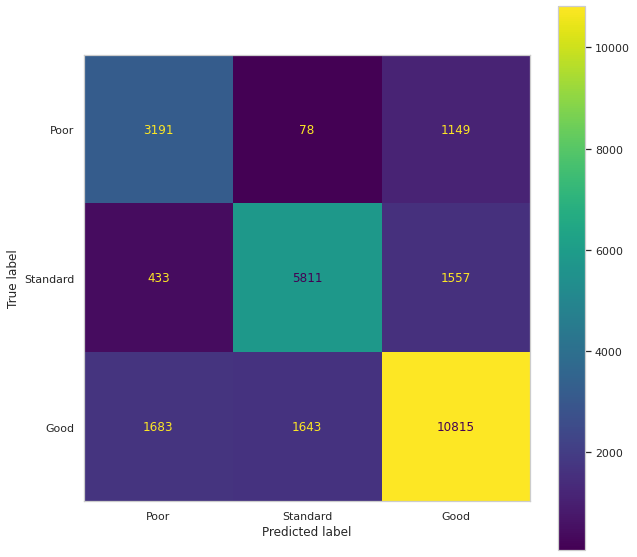

In [203]:
evaluate_classification(rf, "RandomForestClassifier", x_train,x_test,y_train,y_test)

In [204]:
Y_pred=rf.predict(x_test)

In [205]:
data = pd.DataFrame({"Y_test" : y_test , "Y_pred": Y_pred})
data.head(20).T

,5253,48731,16702,68655,57597,69092,67616,66667,43348,40267,47015,43573,3377,33062,73517,66017,10889,85139,27520,3077
Y_test,Standard,Standard,Poor,Good,Poor,Standard,Standard,Poor,Standard,Standard,Standard,Poor,Good,Standard,Poor,Standard,Standard,Standard,Good,Poor
Y_pred,Good,Standard,Poor,Standard,Poor,Standard,Standard,Poor,Standard,Standard,Standard,Poor,Good,Poor,Poor,Standard,Standard,Standard,Standard,Standard


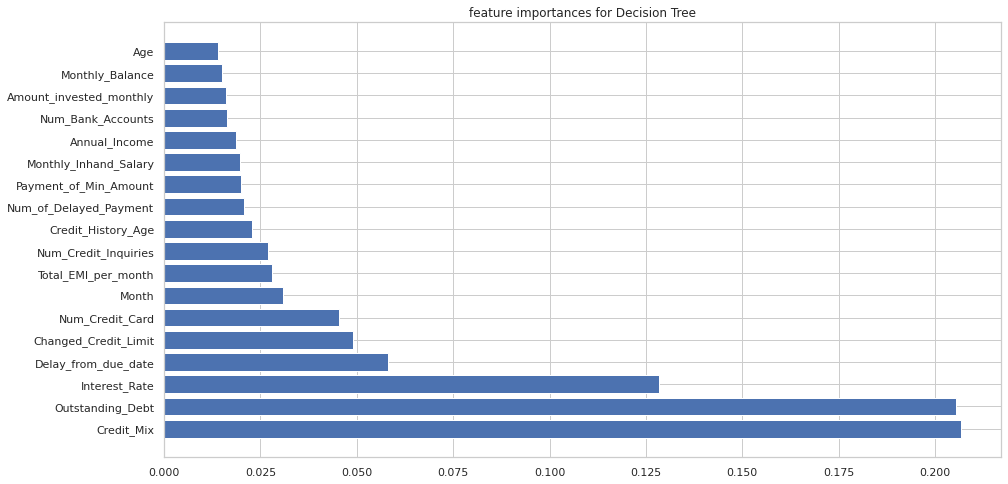

In [206]:
feature_importances(abs(rf.feature_importances_), features, top=18)

## XGBOOST

In [207]:
from xgboost import XGBClassifier

In [208]:
x_train,x_test,y_train,y_test = train_test_split(x,y_Encode, test_size=0.3,random_state = 1234)

In [209]:
xgb = XGBClassifier(max_depth = 5 , learning_rate = 0.3 , objective = 'binary:logistic' , n_estimators= 5, random_state=42)

In [210]:
xgb.fit(x_train , y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=5, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=42, reg_alpha=0, ...)

In [211]:
xgb_score_train=xgb.score(x_train , y_train)
xgb_score_train

0.7203479391919356

In [212]:
xgb_score_test=xgb.score(x_test , y_test)
xgb_score_test

0.7176403641881639

Training Accuracy XGBOOST 72.03479391919356  Test Accuracy XGBOOST 71.76403641881639


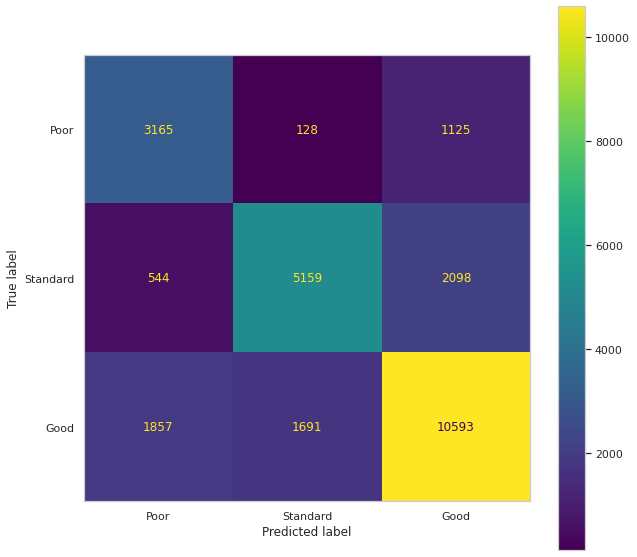

In [213]:
evaluate_classification(xgb, "XGBOOST", x_train,x_test,y_train,y_test)

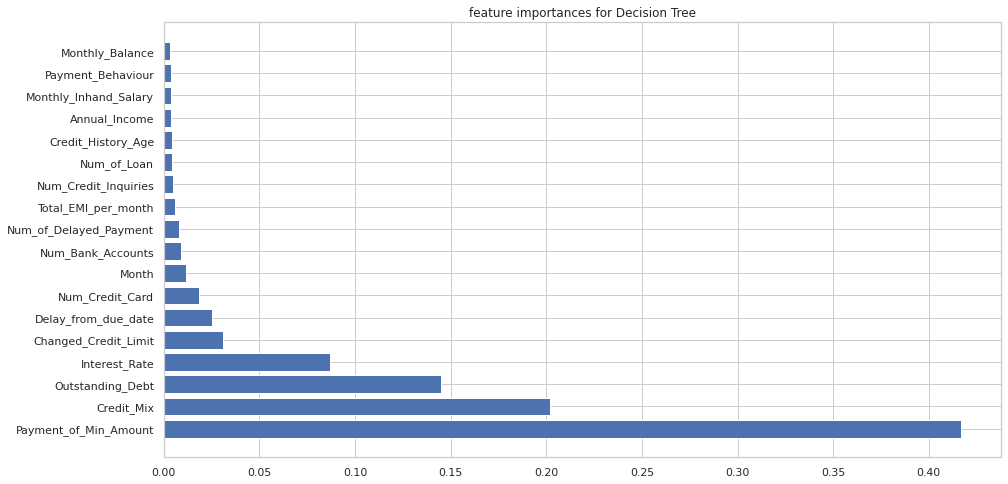

In [214]:
feature_importances(abs(xgb.feature_importances_), features, top=18)

In [215]:
Y_pred=xgb.predict(x_test)

In [216]:
data = pd.DataFrame({"Y_test" : y_test , "Y_pred": Y_pred})
data.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Y_test,2,2,1,0,1,2,2,1,2,2,2,1,0,2,1,2,2,2,0,1
Y_pred,0,0,1,2,1,2,2,1,2,2,2,1,0,2,1,2,0,2,2,2


## adaboost

In [217]:
from sklearn.ensemble import AdaBoostClassifier

In [218]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state = 1234)

In [219]:
ada = AdaBoostClassifier(n_estimators=8, learning_rate=0.8)

In [220]:
ada.fit(x_train , y_train)

AdaBoostClassifier(learning_rate=0.8, n_estimators=8)

In [221]:
ada_score_train=ada.score(x_train , y_train )
ada_score_train

0.6371839687830257

In [222]:
ada_score_test=ada.score(x_test , y_test)
ada_score_test

0.6345599393019726

Training Accuracy adaboost 63.71839687830258  Test Accuracy adaboost 63.455993930197266


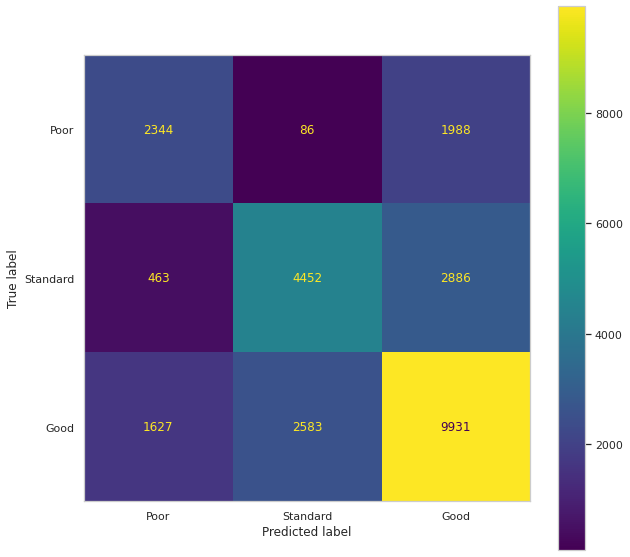

In [223]:
evaluate_classification(ada, "adaboost", x_train,x_test,y_train,y_test)

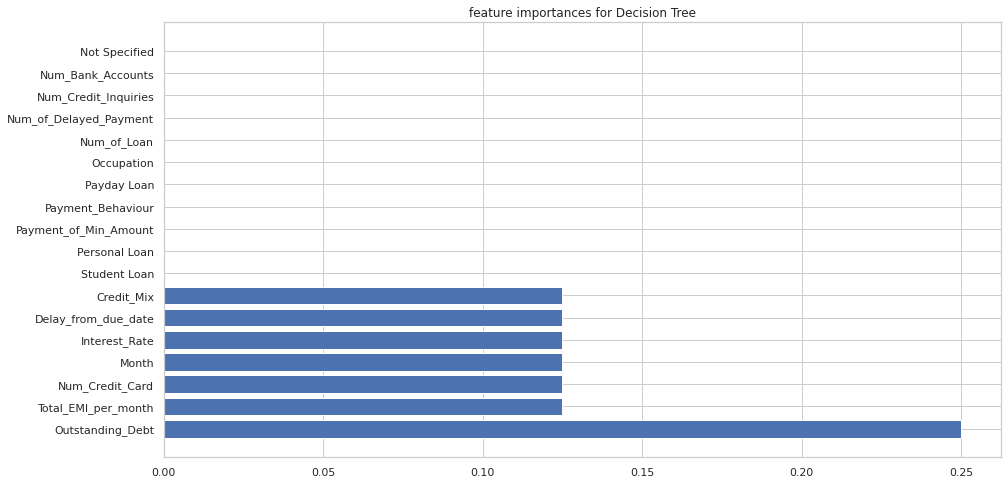

In [224]:
feature_importances(abs(ada.feature_importances_), features, top=18)

In [225]:
Y_pred=ada.predict(x_test)

In [226]:
data = pd.DataFrame({"Y_test" : y_test , "Y_pred": Y_pred})
data.head(20).T

,5253,48731,16702,68655,57597,69092,67616,66667,43348,40267,47015,43573,3377,33062,73517,66017,10889,85139,27520,3077
Y_test,Standard,Standard,Poor,Good,Poor,Standard,Standard,Poor,Standard,Standard,Standard,Poor,Good,Standard,Poor,Standard,Standard,Standard,Good,Poor
Y_pred,Good,Good,Poor,Standard,Poor,Standard,Standard,Standard,Good,Standard,Standard,Poor,Standard,Poor,Poor,Standard,Good,Standard,Standard,Good


## Voting

In [227]:
from sklearn.ensemble import VotingClassifier

In [228]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state = 1234)

In [229]:
clf1 = LogisticRegression(C = 100)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = DecisionTreeClassifier(max_features=14 ,    max_depth=12)
clf4 = RandomForestClassifier(max_features=15 , max_depth=12)
clf5 = XGBClassifier(max_depth = 5 , learning_rate = 0.3 , objective = 'binary:logistic' , n_estimators= 5, random_state=42)
clf6 = AdaBoostClassifier(n_estimators=8, learning_rate=0.8)

In [230]:
v_clf = VotingClassifier(estimators=[("LogisticRegression" , clf1) , ('KNeighborsClassifier' , clf2) ,
                                     ("XGBClassifier" , clf5) ,("RandomForestClassifier" , clf4),
                                     ("DecisionTreeClassifier",clf3),("AdaBoostClassifier",clf6)] , voting = "hard")

In [231]:
v_clf.fit(x_train , y_train)

VotingClassifier(estimators=[('LogisticRegression', LogisticRegression(C=100)),
                             ('KNeighborsClassifier',
                              KNeighborsClassifier(n_neighbors=7)),
                             ('XGBClassifier',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,...
                                            n_estimators=5, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random

In [232]:
v_clf_score_train=v_clf.score(x_train , y_train)
v_clf_score_train

0.769140720266645

In [233]:
v_clf_score_test=v_clf.score(x_test , y_test)
v_clf_score_test

0.7378224582701062

Training Accuracy Voting 76.9140720266645  Test Accuracy Voting 73.78224582701061


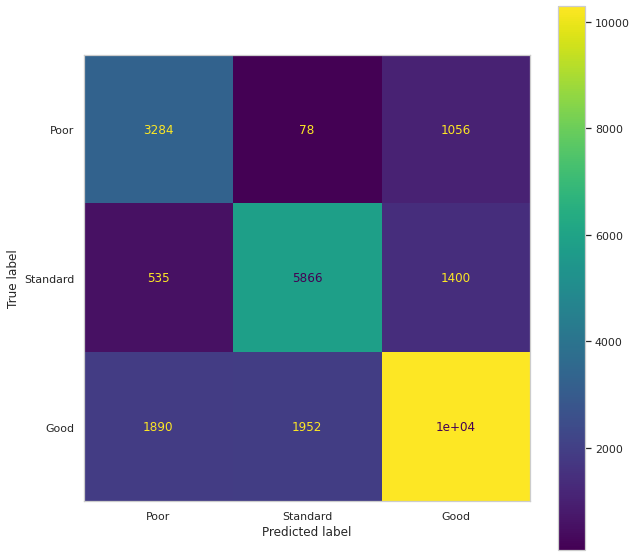

In [234]:
evaluate_classification(v_clf, "Voting", x_train,x_test,y_train,y_test)

In [235]:
Y_pred=v_clf.predict(x_test)

In [236]:
data = pd.DataFrame({"Y_test" : y_test , "Y_pred": Y_pred})
data.head(20).T

,5253,48731,16702,68655,57597,69092,67616,66667,43348,40267,47015,43573,3377,33062,73517,66017,10889,85139,27520,3077
Y_test,Standard,Standard,Poor,Good,Poor,Standard,Standard,Poor,Standard,Standard,Standard,Poor,Good,Standard,Poor,Standard,Standard,Standard,Good,Poor
Y_pred,Good,Standard,Poor,Standard,Poor,Standard,Standard,Poor,Standard,Standard,Standard,Poor,Good,Poor,Poor,Standard,Good,Standard,Standard,Standard


## comperision between models

In [237]:
models = ['Logistic Regression' , 'KNN' , 'Decision Tree','Random forest','XGBOOST','adaboost','Voting']
data = [[lr_score_train ,lr_score_test ] , [knn_score_train ,knn_score_test ] , [dt_score_train ,dt_score_test ],
       [rf_score_train,rf_score_test],[xgb_score_train,xgb_score_test],[ada_score_train,ada_score_test],
        [v_clf_score_train,v_clf_score_test]]
cols = ["Train score" , "Test score"]
pd.DataFrame(data=data , index= models , columns= cols).sort_values(ascending= False , by = ["Test score","Train score"])

,Train score,Test score
Random forest,0.793952,0.751783
Voting,0.769141,0.737822
Decision Tree,0.763905,0.725683
KNN,0.803170,0.723217
XGBOOST,0.720348,0.717640
Logistic Regression,0.653296,0.652466
adaboost,0.637184,0.634560
